# IMPORTS

In [204]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from kneebow.rotor import Rotor
from sklearn.decomposition import PCA

# PROCESAMIENTO Y LIMPIEZA DE DATOS

In [302]:
df_inca_identification = pd.read_csv("./INCA-MINIPROJ/gero-inca/gero-inca-identification.csv",sep=',')
df_inca_identification

,gero-code,participant_id,group
0,CTR_53,sub-214,healthy control
1,CTR_36,sub-161,healthy control
2,CTR_37,sub-172,healthy control
3,CTR_28,sub-138,healthy control
4,CTR_27,sub-139,healthy control
5,CTR_30,sub-142,healthy control
6,CTR_43,sub-192,healthy control
7,CTR_46,sub-196,healthy control
8,CTR_52,sub-198,healthy control
9,CTR_57,sub-201,healthy control


In [303]:
df_inca_demo = pd.read_excel("./INCA-MINIPROJ/MMSE_AVD_Controles_Sanos.xlsx")
df_inca_demo = df_inca_demo.dropna()
df_inca_demo

,Participante,Grupo,Origen Dato MMSE,MMSE_Language_Key,MMSE_Language_Pencil,MMSE_Language_Written_Instruction,MMSE_Language_Written_Sentence,MMSE_Copy_Figure,MMSE_Total_Temporal_Orientation,MMSE_Total_Spatial_Orientation,MMSE_Total_Attention,MMSE_Total_Concentration,MMSE_Total_Memory,MMSE_Language_Phrase,MMSE_Language_Verbal_Instruction,MiniMental_Total_Score,AVD BASICAS,AVD INSTRUMENTAL,AVD AVANZADAS,AVD TOTAL
11,CTR_22,Control Sano T1,Primera Vista Cohorte,1.0,1.0,1,1.0,1.0,5.0,5.0,3.0,5.0,3.0,1.0,3.0,30.0,0.0,11.0,67.0,22.0
16,CTR_27,Control Sano T1,Primera Vista Cohorte,1.0,1.0,1,1.0,1.0,5.0,5.0,3.0,2.0,3.0,1.0,3.0,27.0,0.0,17.0,29.0,18.0
17,CTR_28,Control Sano T1,Primera Vista Cohorte,1.0,1.0,1,1.0,0.0,4.0,5.0,3.0,5.0,1.0,1.0,3.0,26.0,0.0,2.0,7.0,2.0
18,CTR_30,Control Sano T1,Primera Vista Cohorte,1.0,1.0,1,1.0,1.0,5.0,5.0,3.0,5.0,2.0,1.0,3.0,29.0,0.0,2.0,0.0,1.0
19,CTR_31,Control Sano T1,Primera Vista Cohorte,1.0,1.0,1,1.0,1.0,5.0,5.0,3.0,5.0,2.0,1.0,3.0,29.0,0.0,8.0,22.0,9.0
20,CTR_35,Control Sano T1,Primera Vista Cohorte,1.0,1.0,1,1.0,1.0,4.0,5.0,3.0,5.0,1.0,1.0,2.0,26.0,7.0,16.0,33.0,17.0
21,CTR_36,Control Sano T1,Primera Vista Cohorte,1.0,1.0,1,1.0,1.0,5.0,5.0,3.0,4.0,2.0,1.0,3.0,28.0,0.0,0.0,0.0,0.0
22,CTR_37,Control Sano T2,Primera Vista Cohorte,1.0,1.0,1,1.0,1.0,5.0,5.0,3.0,5.0,3.0,1.0,3.0,30.0,0.0,8.0,20.0,9.0
23,CTR_38,Control Sano T1,Primera Vista Cohorte,1.0,1.0,1,1.0,1.0,5.0,5.0,3.0,5.0,3.0,1.0,3.0,30.0,0.0,0.0,13.0,3.0
24,CTR_39,Control Sano T1,Primera Vista Cohorte,1.0,1.0,1,1.0,1.0,5.0,5.0,3.0,3.0,1.0,1.0,3.0,26.0,0.0,8.0,33.0,9.0


In [304]:
df_merged = df_inca_demo.merge(df_inca_identification, left_on="Participante", right_on="gero-code", how="inner")
df_merged

,Participante,Grupo,Origen Dato MMSE,MMSE_Language_Key,MMSE_Language_Pencil,MMSE_Language_Written_Instruction,MMSE_Language_Written_Sentence,MMSE_Copy_Figure,MMSE_Total_Temporal_Orientation,MMSE_Total_Spatial_Orientation,...,MMSE_Language_Phrase,MMSE_Language_Verbal_Instruction,MiniMental_Total_Score,AVD BASICAS,AVD INSTRUMENTAL,AVD AVANZADAS,AVD TOTAL,gero-code,participant_id,group
0,CTR_27,Control Sano T1,Primera Vista Cohorte,1.0,1.0,1,1.0,1.0,5.0,5.0,...,1.0,3.0,27.0,0.0,17.0,29.0,18.0,CTR_27,sub-139,healthy control
1,CTR_28,Control Sano T1,Primera Vista Cohorte,1.0,1.0,1,1.0,0.0,4.0,5.0,...,1.0,3.0,26.0,0.0,2.0,7.0,2.0,CTR_28,sub-138,healthy control
2,CTR_36,Control Sano T1,Primera Vista Cohorte,1.0,1.0,1,1.0,1.0,5.0,5.0,...,1.0,3.0,28.0,0.0,0.0,0.0,0.0,CTR_36,sub-161,healthy control
3,CTR_37,Control Sano T2,Primera Vista Cohorte,1.0,1.0,1,1.0,1.0,5.0,5.0,...,1.0,3.0,30.0,0.0,8.0,20.0,9.0,CTR_37,sub-172,healthy control
4,CTR_43,Control Sano T1,Primera Vista Cohorte,1.0,1.0,1,1.0,1.0,5.0,5.0,...,1.0,3.0,30.0,13.0,37.0,42.0,33.0,CTR_43,sub-192,healthy control
5,CTR_46,Control Sano T1,Primera Vista Cohorte 2,1.0,1.0,1,1.0,1.0,5.0,5.0,...,1.0,3.0,30.0,0.0,5.0,0.0,3.0,CTR_46,sub-196,healthy control
6,CTR_49,Control Sano T1,Primera Vista Cohorte,1.0,1.0,1,1.0,1.0,5.0,5.0,...,1.0,2.0,29.0,0.0,2.0,0.0,1.0,CTR_49,sub-242,healthy control
7,CTR_51,Control Sano T1,Primera Vista Cohorte,1.0,1.0,1,1.0,1.0,5.0,5.0,...,1.0,3.0,29.0,0.0,10.0,13.0,9.0,CTR_51,sub-243,healthy control
8,CTR_52,Control Sano T1,Primera Vista Cohorte,1.0,1.0,-,1.0,1.0,5.0,5.0,...,1.0,3.0,28.0,7.0,2.0,0.0,2.0,CTR_52,sub-198,healthy control
9,CTR_53,Control Sano T1,Primera Vista Cohorte,1.0,1.0,1,1.0,1.0,5.0,5.0,...,1.0,3.0,30.0,0.0,0.0,0.0,0.0,CTR_53,sub-214,healthy control


In [305]:
df_adni_full = pd.read_csv("./ADNI/data_ADNI.csv",sep=',')
df_adni_full

,Unnamed: 0,RID,GROUP_BL,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,MMSCORE,FLDSTRENG,...,rh_lingual_thickness_SD,rh_medialorbitofrontal_volume,rh_medialorbitofrontal_surface,rh_medialorbitofrontal_thickness_mean,rh_medialorbitofrontal_thickness_SD,rh_middletemporal_volume,rh_middletemporal_surface,rh_middletemporal_thickness_mean,rh_middletemporal_thickness_SD,fourthventricle_volume
0,0,2,CN,74.3,Male,16,Not Hisp/Latino,White,28,1.5 Tesla MRI,...,0.694,3835,1622,2.077,0.746,15683,4272,3.028,0.649,4396
1,1,3,AD,81.3,Male,18,Not Hisp/Latino,White,20,1.5 Tesla MRI,...,0.591,3681,1734,1.942,0.696,10387,3316,2.545,0.686,3304
2,2,4,LMCI,67.5,Male,10,Hisp/Latino,White,27,1.5 Tesla MRI,...,0.588,4060,1728,2.180,0.607,11156,3598,2.670,0.631,1338
3,3,5,CN,73.7,Male,16,Not Hisp/Latino,White,29,1.5 Tesla MRI,...,0.628,5180,1868,2.543,0.709,11579,3387,2.911,0.660,1623
4,4,6,LMCI,80.4,Female,13,Not Hisp/Latino,White,25,1.5 Tesla MRI,...,0.631,3078,1241,2.141,0.701,9641,2781,2.900,0.727,1035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,814,1425,LMCI,75.6,Female,16,Not Hisp/Latino,White,28,1.5 Tesla MRI,...,0.662,3634,1457,2.286,0.715,11010,2886,3.021,0.802,981
815,815,1426,LMCI,83.4,Male,18,Not Hisp/Latino,White,26,1.5 Tesla MRI,...,0.511,4025,1703,2.199,0.856,11476,3619,2.670,0.740,3140
816,816,1427,LMCI,69.6,Female,12,Not Hisp/Latino,White,27,1.5 Tesla MRI,...,0.778,4639,1729,2.546,0.728,12498,3692,2.861,0.711,2482
817,817,1430,AD,83.4,Female,12,Not Hisp/Latino,White,21,1.5 Tesla MRI,...,0.661,3430,1213,2.737,1.089,7340,2198,2.794,0.692,1229


In [306]:
df_adni_full = df_adni_full[df_adni_full['GROUP_BL'] == 'CN']
df_adni_full

,Unnamed: 0,RID,GROUP_BL,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,MMSCORE,FLDSTRENG,...,rh_lingual_thickness_SD,rh_medialorbitofrontal_volume,rh_medialorbitofrontal_surface,rh_medialorbitofrontal_thickness_mean,rh_medialorbitofrontal_thickness_SD,rh_middletemporal_volume,rh_middletemporal_surface,rh_middletemporal_thickness_mean,rh_middletemporal_thickness_SD,fourthventricle_volume
0,0,2,CN,74.3,Male,16,Not Hisp/Latino,White,28,1.5 Tesla MRI,...,0.694,3835,1622,2.077,0.746,15683,4272,3.028,0.649,4396
3,3,5,CN,73.7,Male,16,Not Hisp/Latino,White,29,1.5 Tesla MRI,...,0.628,5180,1868,2.543,0.709,11579,3387,2.911,0.660,1623
6,6,8,CN,84.5,Female,18,Not Hisp/Latino,White,28,1.5 Tesla MRI,...,0.541,3435,1412,2.274,0.676,10469,3533,2.601,0.655,2098
8,8,14,CN,78.5,Female,12,Hisp/Latino,White,29,1.5 Tesla MRI,...,0.613,3034,1295,2.145,0.820,10493,3046,2.850,0.714,1296
9,9,15,CN,80.8,Male,18,Not Hisp/Latino,White,29,1.5 Tesla MRI,...,0.578,3982,1608,2.148,0.767,9993,3367,2.517,0.681,1557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,735,1280,CN,70.7,Female,14,Hisp/Latino,White,30,1.5 Tesla MRI,...,0.507,3812,1482,2.364,0.699,9128,2728,2.804,0.654,1592
741,741,1286,CN,75.5,Female,19,Not Hisp/Latino,White,30,1.5 Tesla MRI,...,0.504,4744,2183,1.964,0.704,12185,3473,2.834,0.802,2359
742,742,1288,CN,59.9,Male,20,Not Hisp/Latino,White,30,1.5 Tesla MRI,...,0.663,3903,1567,2.186,0.718,11565,3470,2.866,0.670,1518
752,752,1301,CN,72.1,Female,18,Not Hisp/Latino,White,30,1.5 Tesla MRI,...,0.538,4696,1987,2.267,0.542,10508,3535,2.566,0.705,1680


In [307]:
df_adni = pd.read_csv("./df_adni_gm_volumen.csv",sep=';')
col = df_adni_full["PTEDUCAT"].values
col2 = df_adni_full["MMSCORE"].values
df_adni["PTEDUCAT"] = col
df_adni["MMSCORE"] = col2
df_adni

,Unnamed: 0,RID,PTGENDER,AGE,brainstem_volume,left_vessel_volume,left_caudate_volume,left_putamen_volume,opticchiasm_volume,right_vessel_volume,...,rh_posteriorcingulate_volume,rh_transversetemporal_volume,rh_caudalmiddlefrontal_volume,rh_medialorbitofrontal_volume,rh_lateralorbitofrontal_volume,rh_rostralmiddlefrontal_volume,rh_caudalanteriorcingulate_volume,rh_rostralanteriorcingulate_volume,PTEDUCAT,MMSCORE
0,0,2,Male,74.3,23.003,0.063,4.395,4.892,0.308,0.077,...,3.809,0.553,6.566,3.835,6.795,16.081,2.414,1.935,16,28
1,3,5,Male,73.7,22.015,0.122,3.090,4.778,0.308,0.070,...,3.910,1.022,5.626,5.180,7.397,15.086,1.820,1.878,16,29
2,6,8,Female,84.5,19.434,0.102,2.527,3.976,0.331,0.067,...,3.176,0.568,3.546,3.435,6.036,12.716,1.926,1.767,18,28
3,8,14,Female,78.5,15.665,0.027,3.528,4.189,0.328,0.038,...,2.889,0.683,4.457,3.034,5.795,11.388,1.518,1.316,12,29
4,9,15,Male,80.8,23.706,0.151,2.923,4.351,0.307,0.100,...,2.693,0.512,3.937,3.982,5.292,11.685,2.262,1.738,18,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,735,1280,Female,70.7,20.573,0.027,3.607,5.399,0.223,0.041,...,2.998,0.793,3.844,3.812,5.897,11.660,2.252,1.652,14,30
225,741,1286,Female,75.5,20.872,0.073,4.653,5.373,0.375,0.067,...,3.082,0.883,6.041,4.744,5.509,12.911,1.296,1.026,19,30
226,742,1288,Male,59.9,24.679,0.097,3.639,6.264,0.379,0.049,...,3.155,0.823,7.391,3.903,6.904,15.807,1.526,2.079,20,30
227,752,1301,Female,72.1,24.993,0.073,3.000,4.965,0.211,0.053,...,3.043,0.615,5.034,4.696,6.203,11.176,1.633,1.279,18,30


In [308]:
df_inca = pd.read_csv("./df_inca_gm_volumen.csv",sep=';')
df_inca

,Unnamed: 0,participant_id,gender,age,brain-stem,left-vessel,left-caudate,left-putamen,optic-chiasm,right-vessel,...,rh_superiorparietal,rh_superiortemporal,rh_posteriorcingulate,rh_transversetemporal,rh_caudalmiddlefrontal,rh_medialorbitofrontal,rh_lateralorbitofrontal,rh_rostralmiddlefrontal,rh_caudalanteriorcingulate,rh_rostralanteriorcingulate
0,0,sub-214,f,74.364384,17.4850,0.0175,3.4699,4.4771,0.1348,0.0041,...,7.995,8.407,2.728,0.790,6.786,5.119,6.295,12.485,1.721,1.577
1,1,sub-161,f,78.394521,16.8912,0.0032,3.3686,4.8374,0.1614,0.0000,...,12.380,6.722,2.839,0.481,4.228,4.611,6.172,10.610,2.139,1.795
2,2,sub-172,f,77.320548,15.7690,0.0064,2.7845,3.6798,0.1129,0.0133,...,11.494,8.834,2.333,0.556,3.636,4.097,5.724,9.595,1.817,1.561
3,3,sub-138,m,73.520548,22.1628,0.0239,3.0680,4.7896,0.2166,0.0161,...,13.398,12.635,2.604,0.889,4.694,5.449,7.067,13.859,1.692,1.686
4,4,sub-139,m,76.424658,17.3174,0.0042,2.9996,3.7887,0.1696,0.0161,...,12.688,10.043,2.805,0.855,4.793,6.076,6.567,12.435,1.812,1.328
5,5,sub-142,f,72.142466,16.3012,0.0176,2.8895,3.8551,0.0904,0.0070,...,10.261,9.337,2.221,0.654,4.719,5.160,5.663,12.078,1.205,1.230
6,6,sub-192,f,91.479452,17.7342,0.0600,2.6106,4.0005,0.2235,0.0116,...,10.364,9.757,2.545,0.601,4.017,5.220,6.540,12.816,1.104,1.480
7,7,sub-196,f,77.093151,20.4006,0.0139,2.9633,4.4863,0.1896,0.0386,...,11.453,9.556,2.531,0.794,5.301,5.494,7.040,13.688,1.247,1.594
8,8,sub-198,f,75.331507,19.7109,0.0261,2.5264,4.0270,0.1505,0.0162,...,9.866,9.492,2.532,0.759,4.635,4.728,6.975,11.092,1.120,1.253
9,9,sub-201,f,73.991781,19.5976,0.1781,3.5735,4.5291,0.2393,0.0109,...,10.643,9.164,2.409,0.697,4.082,5.025,6.287,12.608,0.602,1.684


In [309]:
df_inca_psico = df_inca.merge(df_merged, left_on="participant_id", right_on="participant_id", how="inner")
df_inca_psico

,Unnamed: 0,participant_id,gender,age,brain-stem,left-vessel,left-caudate,left-putamen,optic-chiasm,right-vessel,...,MMSE_Total_Memory,MMSE_Language_Phrase,MMSE_Language_Verbal_Instruction,MiniMental_Total_Score,AVD BASICAS,AVD INSTRUMENTAL,AVD AVANZADAS,AVD TOTAL,gero-code,group
0,0,sub-214,f,74.364384,17.4850,0.0175,3.4699,4.4771,0.1348,0.0041,...,3.0,1.0,3.0,30.0,0.0,0.0,0.0,0.0,CTR_53,healthy control
1,1,sub-161,f,78.394521,16.8912,0.0032,3.3686,4.8374,0.1614,0.0000,...,2.0,1.0,3.0,28.0,0.0,0.0,0.0,0.0,CTR_36,healthy control
2,2,sub-172,f,77.320548,15.7690,0.0064,2.7845,3.6798,0.1129,0.0133,...,3.0,1.0,3.0,30.0,0.0,8.0,20.0,9.0,CTR_37,healthy control
3,3,sub-138,m,73.520548,22.1628,0.0239,3.0680,4.7896,0.2166,0.0161,...,1.0,1.0,3.0,26.0,0.0,2.0,7.0,2.0,CTR_28,healthy control
4,4,sub-139,m,76.424658,17.3174,0.0042,2.9996,3.7887,0.1696,0.0161,...,3.0,1.0,3.0,27.0,0.0,17.0,29.0,18.0,CTR_27,healthy control
5,6,sub-192,f,91.479452,17.7342,0.0600,2.6106,4.0005,0.2235,0.0116,...,3.0,1.0,3.0,30.0,13.0,37.0,42.0,33.0,CTR_43,healthy control
6,7,sub-196,f,77.093151,20.4006,0.0139,2.9633,4.4863,0.1896,0.0386,...,3.0,1.0,3.0,30.0,0.0,5.0,0.0,3.0,CTR_46,healthy control
7,8,sub-198,f,75.331507,19.7109,0.0261,2.5264,4.0270,0.1505,0.0162,...,2.0,1.0,3.0,28.0,7.0,2.0,0.0,2.0,CTR_52,healthy control
8,9,sub-201,f,73.991781,19.5976,0.1781,3.5735,4.5291,0.2393,0.0109,...,3.0,1.0,3.0,30.0,0.0,5.0,5.0,4.0,CTR_57,healthy control
9,10,sub-202,f,77.923288,15.9974,0.0936,2.9457,4.4270,0.2525,0.0246,...,3.0,1.0,3.0,30.0,0.0,0.0,0.0,0.0,CTR_54,healthy control


In [310]:
df_inca["age"] = df_inca["age"].apply(lambda x: round(x))
df_inca

,Unnamed: 0,participant_id,gender,age,brain-stem,left-vessel,left-caudate,left-putamen,optic-chiasm,right-vessel,...,rh_superiorparietal,rh_superiortemporal,rh_posteriorcingulate,rh_transversetemporal,rh_caudalmiddlefrontal,rh_medialorbitofrontal,rh_lateralorbitofrontal,rh_rostralmiddlefrontal,rh_caudalanteriorcingulate,rh_rostralanteriorcingulate
0,0,sub-214,f,74,17.4850,0.0175,3.4699,4.4771,0.1348,0.0041,...,7.995,8.407,2.728,0.790,6.786,5.119,6.295,12.485,1.721,1.577
1,1,sub-161,f,78,16.8912,0.0032,3.3686,4.8374,0.1614,0.0000,...,12.380,6.722,2.839,0.481,4.228,4.611,6.172,10.610,2.139,1.795
2,2,sub-172,f,77,15.7690,0.0064,2.7845,3.6798,0.1129,0.0133,...,11.494,8.834,2.333,0.556,3.636,4.097,5.724,9.595,1.817,1.561
3,3,sub-138,m,74,22.1628,0.0239,3.0680,4.7896,0.2166,0.0161,...,13.398,12.635,2.604,0.889,4.694,5.449,7.067,13.859,1.692,1.686
4,4,sub-139,m,76,17.3174,0.0042,2.9996,3.7887,0.1696,0.0161,...,12.688,10.043,2.805,0.855,4.793,6.076,6.567,12.435,1.812,1.328
5,5,sub-142,f,72,16.3012,0.0176,2.8895,3.8551,0.0904,0.0070,...,10.261,9.337,2.221,0.654,4.719,5.160,5.663,12.078,1.205,1.230
6,6,sub-192,f,91,17.7342,0.0600,2.6106,4.0005,0.2235,0.0116,...,10.364,9.757,2.545,0.601,4.017,5.220,6.540,12.816,1.104,1.480
7,7,sub-196,f,77,20.4006,0.0139,2.9633,4.4863,0.1896,0.0386,...,11.453,9.556,2.531,0.794,5.301,5.494,7.040,13.688,1.247,1.594
8,8,sub-198,f,75,19.7109,0.0261,2.5264,4.0270,0.1505,0.0162,...,9.866,9.492,2.532,0.759,4.635,4.728,6.975,11.092,1.120,1.253
9,9,sub-201,f,74,19.5976,0.1781,3.5735,4.5291,0.2393,0.0109,...,10.643,9.164,2.409,0.697,4.082,5.025,6.287,12.608,0.602,1.684


In [311]:
def_inca_assessment = pd.read_csv("./INCA-MINIPROJ/assessments/assessments-hc.csv",sep=',')
def_inca_assessment

,participant_id,MoCA,FCSRT-RL,FCSRT-RT,FCSRT-RC,age,Escolaridad,group
0,sub-38,27,34,48,14,79.638356,12,healthy control
1,sub-237,23,32,48,16,72.586301,12,healthy control
2,sub-78,25,32,48,16,75.893151,10,healthy control
3,sub-40,29,32,48,15,70.128767,16,healthy control
4,sub-35,22,30,48,18,74.295890,23,healthy control
5,sub-41,24,33,48,15,80.254795,10,healthy control
6,sub-238,22,35,46,10,72.057534,17,healthy control
7,sub-61,24,34,48,14,81.032877,15,healthy control
8,sub-71,23,46,48,1,73.079452,11,healthy control
9,sub-139,24,29,48,19,76.424658,3,healthy control


In [312]:
df_inca_esco = df_inca.merge(def_inca_assessment, left_on="participant_id", right_on="participant_id", how="inner")
df_inca_esco

,Unnamed: 0,participant_id,gender,age_x,brain-stem,left-vessel,left-caudate,left-putamen,optic-chiasm,right-vessel,...,rh_rostralmiddlefrontal,rh_caudalanteriorcingulate,rh_rostralanteriorcingulate,MoCA,FCSRT-RL,FCSRT-RT,FCSRT-RC,age_y,Escolaridad,group
0,0,sub-214,f,74,17.4850,0.0175,3.4699,4.4771,0.1348,0.0041,...,12.485,1.721,1.577,27,36,48,12,74.364384,15,healthy control
1,1,sub-161,f,78,16.8912,0.0032,3.3686,4.8374,0.1614,0.0000,...,10.610,2.139,1.795,27,33,48,15,78.394521,17,healthy control
2,2,sub-172,f,77,15.7690,0.0064,2.7845,3.6798,0.1129,0.0133,...,9.595,1.817,1.561,27,38,48,9,77.320548,17,healthy control
3,3,sub-138,m,74,22.1628,0.0239,3.0680,4.7896,0.2166,0.0161,...,13.859,1.692,1.686,23,24,47,23,73.520548,13,healthy control
4,4,sub-139,m,76,17.3174,0.0042,2.9996,3.7887,0.1696,0.0161,...,12.435,1.812,1.328,24,29,48,19,76.424658,3,healthy control
5,5,sub-142,f,72,16.3012,0.0176,2.8895,3.8551,0.0904,0.0070,...,12.078,1.205,1.230,22,34,48,14,72.142466,8,healthy control
6,6,sub-192,f,91,17.7342,0.0600,2.6106,4.0005,0.2235,0.0116,...,12.816,1.104,1.480,27,31,48,17,91.479452,12,healthy control
7,7,sub-196,f,77,20.4006,0.0139,2.9633,4.4863,0.1896,0.0386,...,13.688,1.247,1.594,29,34,48,14,77.093151,22,healthy control
8,8,sub-198,f,75,19.7109,0.0261,2.5264,4.0270,0.1505,0.0162,...,11.092,1.120,1.253,25,36,48,12,75.331507,17,healthy control
9,9,sub-201,f,74,19.5976,0.1781,3.5735,4.5291,0.2393,0.0109,...,12.608,0.602,1.684,27,37,48,10,73.991781,17,healthy control


In [313]:
df_adni.columns.values

array(['Unnamed: 0', 'RID', 'PTGENDER', 'AGE', 'brainstem_volume',
       'left_vessel_volume', 'left_caudate_volume', 'left_putamen_volume',
       'opticchiasm_volume', 'right_vessel_volume',
       'left_amygdala_volume', 'left_pallidum_volume',
       'left_thalamus_volume', 'right_caudate_volume',
       'right_putamen_volume', 'right_amygdala_volume',
       'right_pallidum_volume', 'right_thalamus_volume',
       'left_hippocampus_volume', 'right_hippocampus_volume',
       'right_inferiorlateralventricle_volume',
       'nonwmhypointensities_volume', 'left_choroidplexus_volume',
       'right_choroidplexus_volume', 'left_cerebellumcortex_volume',
       'left_anteriorlateralventricle', 'left_lateralventricle_volume',
       'nonwmhypointensities_volume.1', 'right_cerebellumcortex_volume',
       'right_inferiorlateralventricle_volume.1',
       'right_lateralventricle_volume', 'eTIV', 'lh_cuneus_volume',
       'lh_insula_volume', 'lh_lingual_volume', 'lh_bankssts_volume',
    

In [314]:
df_inca_esco.columns.values

array(['Unnamed: 0', 'participant_id', 'gender', 'age_x', 'brain-stem',
       'left-vessel', 'left-caudate', 'left-putamen', 'optic-chiasm',
       'right-vessel', 'left-amygdala', 'left-pallidum', 'left-thalamus',
       'right-caudate', 'right-putamen', 'right-amygdala',
       'right-pallidum', 'right-thalamus', 'left-hippocampus',
       'right-hippocampus', 'right-inf-lat-vent', 'wm-hypointensities',
       'left-choroid-plexus', 'right-choroid-plexus',
       'left-cerebellum-cortex', 'left-lateral-ventricle',
       'left-lateral-ventricle.1', 'non-wm-hypointensities',
       'right-cerebellum-cortex', 'right-lateral-ventricle',
       'right-lateral-ventricle.1', 'etiv', 'lh_cuneus', 'lh_insula',
       'lh_lingual', 'lh_bankssts', 'lh_fusiform', 'lh_precuneus',
       'lh_entorhinal', 'lh_precentral', 'lh_frontalpole',
       'lh_paracentral', 'lh_postcentral', 'lh_temporalpole',
       'lh_parsorbitalis', 'lh_pericalcarine', 'lh_supramarginal',
       'lh_middletemporal', 'l

In [315]:
df_inca_esco.columns[4:100].values
df_inca_esco.columns[100:].values

array(['MoCA', 'FCSRT-RL', 'FCSRT-RT', 'FCSRT-RC', 'age_y', 'Escolaridad',
       'group'], dtype=object)

In [316]:
print(len(df_inca_esco.columns[4:100]))

96


In [317]:
df_adni_new = df_adni.dropna()
df_adni_new["AGE"] = df_adni_new["AGE"].apply(lambda x: round(x))
df_adni_new['PTGENDER'] = df_adni_new['PTGENDER'].replace({'Male': 'Hombre', 'Female': 'Mujer'})
df_adni_new

C:\Users\andre\AppData\Local\Temp\ipykernel_25040\3565031369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adni_new["AGE"] = df_adni_new["AGE"].apply(lambda x: round(x))
C:\Users\andre\AppData\Local\Temp\ipykernel_25040\3565031369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adni_new['PTGENDER'] = df_adni_new['PTGENDER'].replace({'Male': 'Hombre', 'Female': 'Mujer'})


,Unnamed: 0,RID,PTGENDER,AGE,brainstem_volume,left_vessel_volume,left_caudate_volume,left_putamen_volume,opticchiasm_volume,right_vessel_volume,...,rh_posteriorcingulate_volume,rh_transversetemporal_volume,rh_caudalmiddlefrontal_volume,rh_medialorbitofrontal_volume,rh_lateralorbitofrontal_volume,rh_rostralmiddlefrontal_volume,rh_caudalanteriorcingulate_volume,rh_rostralanteriorcingulate_volume,PTEDUCAT,MMSCORE
0,0,2,Hombre,74,23.003,0.063,4.395,4.892,0.308,0.077,...,3.809,0.553,6.566,3.835,6.795,16.081,2.414,1.935,16,28
1,3,5,Hombre,74,22.015,0.122,3.090,4.778,0.308,0.070,...,3.910,1.022,5.626,5.180,7.397,15.086,1.820,1.878,16,29
2,6,8,Mujer,84,19.434,0.102,2.527,3.976,0.331,0.067,...,3.176,0.568,3.546,3.435,6.036,12.716,1.926,1.767,18,28
3,8,14,Mujer,78,15.665,0.027,3.528,4.189,0.328,0.038,...,2.889,0.683,4.457,3.034,5.795,11.388,1.518,1.316,12,29
4,9,15,Hombre,81,23.706,0.151,2.923,4.351,0.307,0.100,...,2.693,0.512,3.937,3.982,5.292,11.685,2.262,1.738,18,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,735,1280,Mujer,71,20.573,0.027,3.607,5.399,0.223,0.041,...,2.998,0.793,3.844,3.812,5.897,11.660,2.252,1.652,14,30
225,741,1286,Mujer,76,20.872,0.073,4.653,5.373,0.375,0.067,...,3.082,0.883,6.041,4.744,5.509,12.911,1.296,1.026,19,30
226,742,1288,Hombre,60,24.679,0.097,3.639,6.264,0.379,0.049,...,3.155,0.823,7.391,3.903,6.904,15.807,1.526,2.079,20,30
227,752,1301,Mujer,72,24.993,0.073,3.000,4.965,0.211,0.053,...,3.043,0.615,5.034,4.696,6.203,11.176,1.633,1.279,18,30


In [318]:
df_inca['gender'] = df_inca['gender'].replace({'m': 'Hombre', 'f': 'Mujer'})
df_inca

,Unnamed: 0,participant_id,gender,age,brain-stem,left-vessel,left-caudate,left-putamen,optic-chiasm,right-vessel,...,rh_superiorparietal,rh_superiortemporal,rh_posteriorcingulate,rh_transversetemporal,rh_caudalmiddlefrontal,rh_medialorbitofrontal,rh_lateralorbitofrontal,rh_rostralmiddlefrontal,rh_caudalanteriorcingulate,rh_rostralanteriorcingulate
0,0,sub-214,Mujer,74,17.4850,0.0175,3.4699,4.4771,0.1348,0.0041,...,7.995,8.407,2.728,0.790,6.786,5.119,6.295,12.485,1.721,1.577
1,1,sub-161,Mujer,78,16.8912,0.0032,3.3686,4.8374,0.1614,0.0000,...,12.380,6.722,2.839,0.481,4.228,4.611,6.172,10.610,2.139,1.795
2,2,sub-172,Mujer,77,15.7690,0.0064,2.7845,3.6798,0.1129,0.0133,...,11.494,8.834,2.333,0.556,3.636,4.097,5.724,9.595,1.817,1.561
3,3,sub-138,Hombre,74,22.1628,0.0239,3.0680,4.7896,0.2166,0.0161,...,13.398,12.635,2.604,0.889,4.694,5.449,7.067,13.859,1.692,1.686
4,4,sub-139,Hombre,76,17.3174,0.0042,2.9996,3.7887,0.1696,0.0161,...,12.688,10.043,2.805,0.855,4.793,6.076,6.567,12.435,1.812,1.328
5,5,sub-142,Mujer,72,16.3012,0.0176,2.8895,3.8551,0.0904,0.0070,...,10.261,9.337,2.221,0.654,4.719,5.160,5.663,12.078,1.205,1.230
6,6,sub-192,Mujer,91,17.7342,0.0600,2.6106,4.0005,0.2235,0.0116,...,10.364,9.757,2.545,0.601,4.017,5.220,6.540,12.816,1.104,1.480
7,7,sub-196,Mujer,77,20.4006,0.0139,2.9633,4.4863,0.1896,0.0386,...,11.453,9.556,2.531,0.794,5.301,5.494,7.040,13.688,1.247,1.594
8,8,sub-198,Mujer,75,19.7109,0.0261,2.5264,4.0270,0.1505,0.0162,...,9.866,9.492,2.532,0.759,4.635,4.728,6.975,11.092,1.120,1.253
9,9,sub-201,Mujer,74,19.5976,0.1781,3.5735,4.5291,0.2393,0.0109,...,10.643,9.164,2.409,0.697,4.082,5.025,6.287,12.608,0.602,1.684


# DESARROLLO DEL CÓDIGO

## EXTRA

In [17]:
#Calculamos La distancia k para determinar nuestro valor de eps.
def calculate_kn_distance(X, neigh=2):
    neigh = NearestNeighbors(n_neighbors=neigh)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    return distances[:,1:].reshape(-1)  

#Obtenemos el valor exacto de eps utilizando kneebow, esta función nos permite
#encontrar el codo de una curva rotando La curva y tomando el valor mínimo.
def get_eps(X, neigh=2):
    eps_dist = np.sort(calculate_kn_distance(X, neigh=neigh))
    rotor = Rotor()
    curve_xy = np.concatenate([np.arange(eps_dist.shape[0]).reshape(-1, 1), eps_dist.reshape(-1, 1)],1)
    rotor.fit_rotate(curve_xy)
    #rotor.plot_elbow()
    e_idx = rotor.get_elbow_index()
    return curve_xy[e_idx]

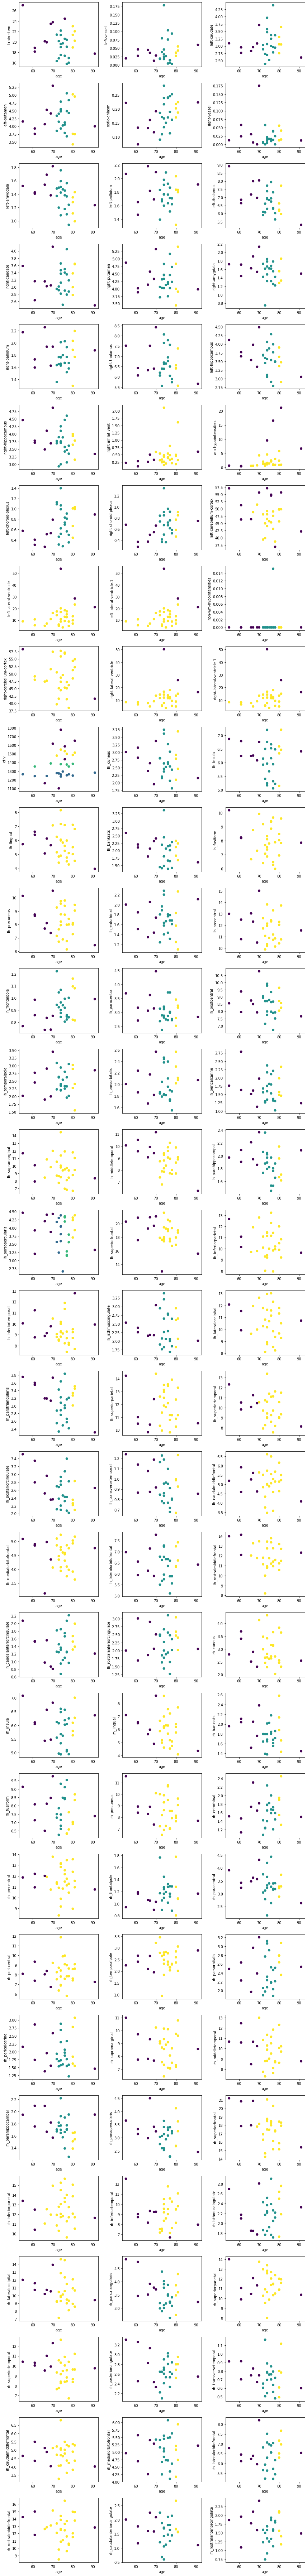

In [319]:
def plotalot(df,col,colnames,numrow,numcol):
    fig1, axes1 = plt.subplots(numrow, numcol, figsize=(12, 100))
    
    index = 0
    for i in range(0,len(colnames)):
        
        new_df = pd.DataFrame({'vol':df[colnames[i]], 'vol2': df[col]})
        idx, epsilon = get_eps(new_df,4)
        
        dbscan = DBSCAN(eps=epsilon, metric = "euclidean").fit(new_df)
        clusters = dbscan.fit_predict(new_df)
        
        df_values = new_df.values

        ax = axes1.flatten()[index]
        ax.scatter(df_values[:, 1], df_values[:, 0], c=clusters)
        #ax.set_title("ASD") 
        ax.set_xlabel(col)
        ax.set_ylabel(colnames[i])
        #ax.set_ylim(-0.1, 1.1) 

        index += 1
        
    plt.tight_layout()
    plt.show()
    
plotalot(df_inca,"age",df_inca.columns[4:100],32,3) 

In [320]:
print(len(df_adni.columns[4:100]))
df_adni.columns[4:100].values

96


array(['brainstem_volume', 'left_vessel_volume', 'left_caudate_volume',
       'left_putamen_volume', 'opticchiasm_volume', 'right_vessel_volume',
       'left_amygdala_volume', 'left_pallidum_volume',
       'left_thalamus_volume', 'right_caudate_volume',
       'right_putamen_volume', 'right_amygdala_volume',
       'right_pallidum_volume', 'right_thalamus_volume',
       'left_hippocampus_volume', 'right_hippocampus_volume',
       'right_inferiorlateralventricle_volume',
       'nonwmhypointensities_volume', 'left_choroidplexus_volume',
       'right_choroidplexus_volume', 'left_cerebellumcortex_volume',
       'left_anteriorlateralventricle', 'left_lateralventricle_volume',
       'nonwmhypointensities_volume.1', 'right_cerebellumcortex_volume',
       'right_inferiorlateralventricle_volume.1',
       'right_lateralventricle_volume', 'eTIV', 'lh_cuneus_volume',
       'lh_insula_volume', 'lh_lingual_volume', 'lh_bankssts_volume',
       'lh_fusiform_volume', 'lh_precuneus_volume',

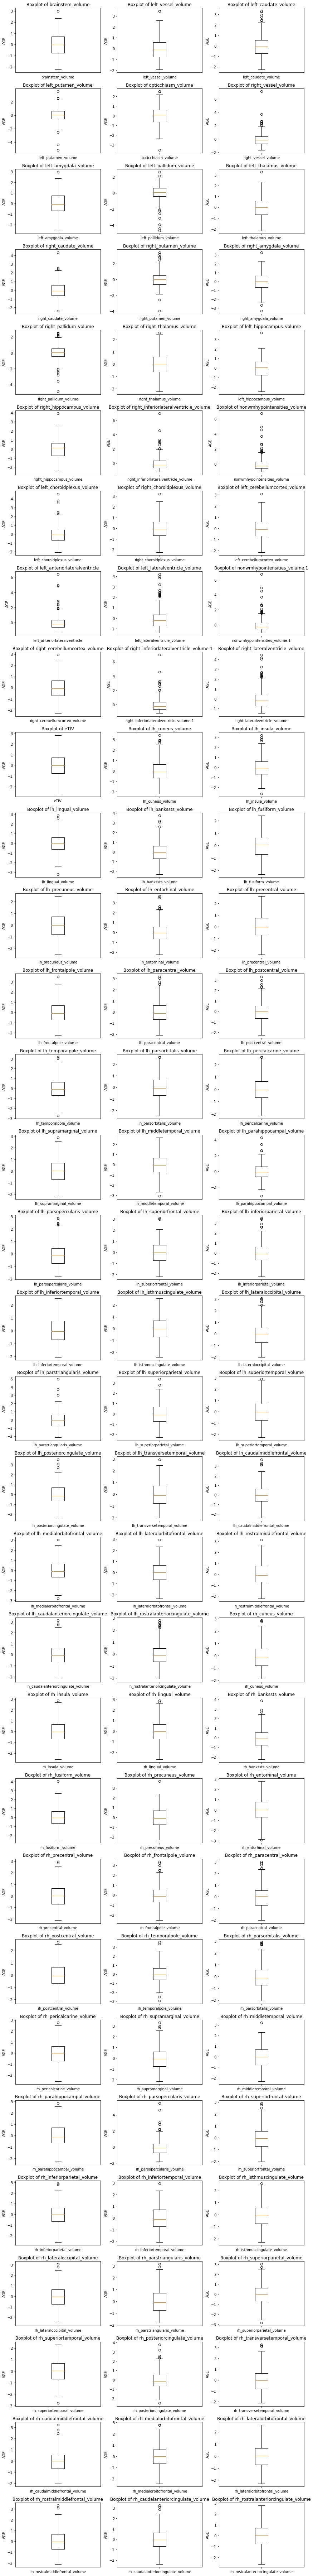

In [137]:
plotalotboxes(df_adni_new,"AGE",df_adni_new.columns[4:100],32,3) 

TypeError: Axes.boxplot() got an unexpected keyword argument 'c'

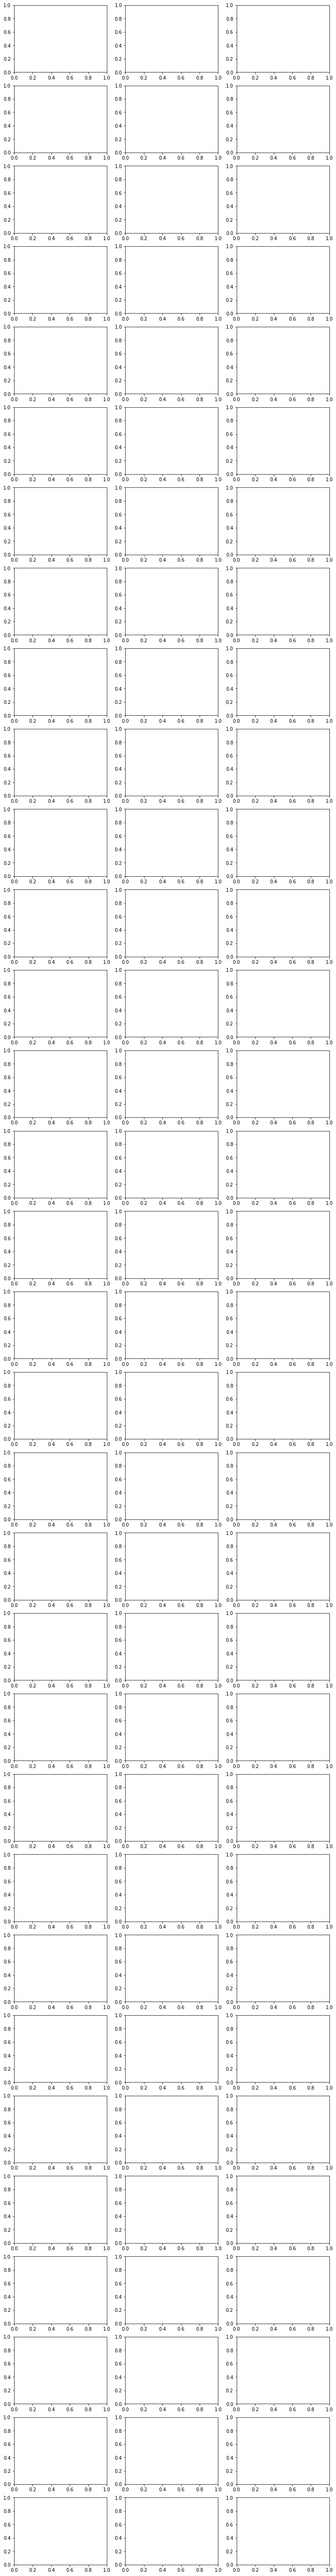

In [132]:
plotalot(df_adni_new,"MMSCORE",df_adni_new.columns[4:100],32,3) 

In [22]:
# Ejecutamos DBSCAN
#dbscan = DBSCAN(eps=0.1, metric = "euclidean").fit(new_df)
#clusters = dbscan.fit_predict(new_df)
#print(clusters)
#df_values = new_df.values
# Graficación de los clústers.
#plt.scatter(df_values[:, 1], df_values[:, 0], c=clusters)
#plt.xlabel("brain-stem")
#plt.ylabel("Edad")

## Análisis Pareado

In [321]:
def df_for_analysis(df,col_var,ran1,ran2):
  
    new_df_vol = df.iloc[:, ran1:ran2]
    
    list_df = []
        
    for c in col_var:
        new_df_vol_c = new_df_vol.copy()
        new_df_vol_c[c] = df[c].values
        list_df.append(new_df_vol_c)
        
    list_df_max = []
        
    for i in range(len(col_var)):
        resultado = list_df[i].groupby(col_var[i]).max()
        list_df_max.append(resultado)
        
    list_df_mean = []
        
    for i in range(len(col_var)):
        resultado = list_df[i].groupby(col_var[i]).mean()
        list_df_mean.append(resultado)
        
    list_df_min = []
        
    for i in range(len(col_var)):
        resultado = list_df[i].groupby(col_var[i]).min()
        list_df_min.append(resultado)
        
    list_df_count = []
        
    for i in range(len(col_var)):
        resultado = list_df[i].groupby(col_var[i]).size().reset_index(name='Cantidad')
        list_df_count.append(resultado)
    
    return list_df_mean, list_df_max, list_df_min, list_df_count
        

### ADNI

In [322]:
# Columnas a eliminar
col_s = list(df_adni_new.columns.values)
col_s.remove("left_anteriorlateralventricle")
col_s.remove("nonwmhypointensities_volume")
col_s.remove("right_inferiorlateralventricle_volume")
col_s = np.array(col_s)
df_adni_clean = df_adni_new[col_s]
print(len(df_adni_new.columns.values))
print(len(df_adni_clean.columns.values))

102
99


In [323]:
from tabulate import tabulate

col_var = ['AGE', 'PTEDUCAT', 'MMSCORE', 'PTGENDER']
ran1 = 4
ran2 = 97
adni_means, adni_maxs, adni_mins, adni_counts = df_for_analysis(df_adni_clean,col_var,ran1,ran2)

print("================================= PROMEDIO =================================")
for i in range(len(col_var)):
    print(col_var[i]+":")
    print(tabulate(adni_means[i], headers='keys', tablefmt='psql'))

print("================================= MAXIMOS =================================")
for i in range(len(col_var)):
    print(col_var[i]+":")
    print(tabulate(adni_maxs[i], headers='keys', tablefmt='psql'))
    
print("================================= MINIMOS =================================")
for i in range(len(col_var)):
    print(col_var[i]+":")
    print(tabulate(adni_mins[i], headers='keys', tablefmt='psql'))
    
print("================================= CONTEO =================================")
for i in range(len(col_var)):
    print(col_var[i]+":")
    print(tabulate(adni_counts[i], headers='keys', tablefmt='psql'))

================================= PROMEDIO =================================
AGE:
+-------+--------------------+----------------------+-----------------------+-----------------------+----------------------+-----------------------+------------------------+------------------------+------------------------+------------------------+------------------------+-------------------------+-------------------------+-------------------------+---------------------------+----------------------------+-----------------------------+------------------------------+--------------------------------+--------------------------------+---------------------------------+---------------------------------+-------------------------------------------+---------------------------------+---------+--------------------+--------------------+---------------------+----------------------+----------------------+-----------------------+------------------------+------------------------+-------------------------+-----------------

AGE
60    25.141194
62    21.206323
63    22.766925
65    21.872828
70    22.932259
71    22.483208
72    23.057013
73    23.227067
74    22.784833
75    23.215942
76    23.828660
77    23.448604
78    22.434048
79    22.660703
80    23.371211
81    22.539656
82    20.853649
83    23.710950
84    21.209885
85    23.622077
86    21.083346
87    22.079151
88    24.082387
89    20.778108
90    22.611054
dtype: float64


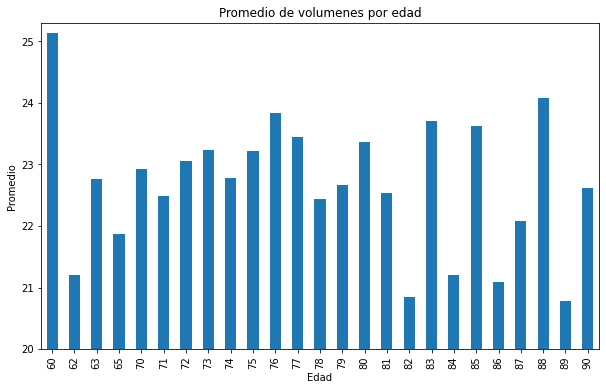

In [324]:
# Calcular el promedio de cada fila
row_means = adni_means[0].mean(axis=1)

print(row_means)

# Graficar el promedio de cada fila
row_means.plot(kind='bar', figsize=(10, 6))

# Configurar el título y las etiquetas de los ejes
plt.title('Promedio de volumenes por edad')
plt.xlabel('Edad')
plt.ylabel('Promedio')


plt.ylim(20, 25.3)
# Mostrar el gráfico
plt.show()

PTEDUCAT
6     19.499742
7     20.852005
8     21.666462
9     20.175086
10    21.335009
12    22.743781
13    21.895381
14    22.291316
15    22.344850
16    23.433626
17    22.207309
18    23.289314
19    23.320570
20    23.823539
dtype: float64


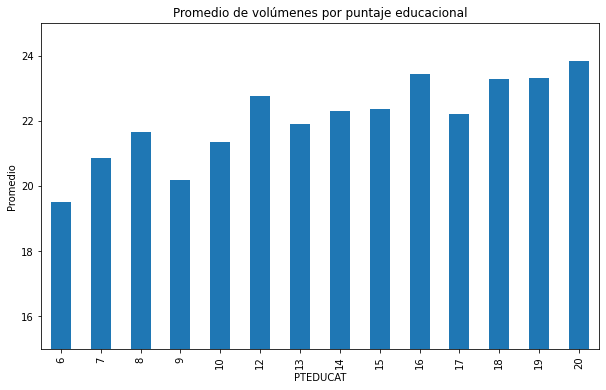

In [231]:
# Calcular el promedio de cada fila
row_means = adni_means[1].mean(axis=1)

print(row_means)

# Graficar el promedio de cada fila
row_means.plot(kind='bar', figsize=(10, 6))

# Configurar el título y las etiquetas de los ejes
plt.title('Promedio de volúmenes por puntaje educacional')
plt.xlabel('PTEDUCAT')
plt.ylabel('Promedio')


plt.ylim(15, 25)
# Mostrar el gráfico
plt.show()

MMSCORE
25    24.408290
26    21.619331
27    22.945405
28    23.459158
29    22.919294
30    22.817561
dtype: float64


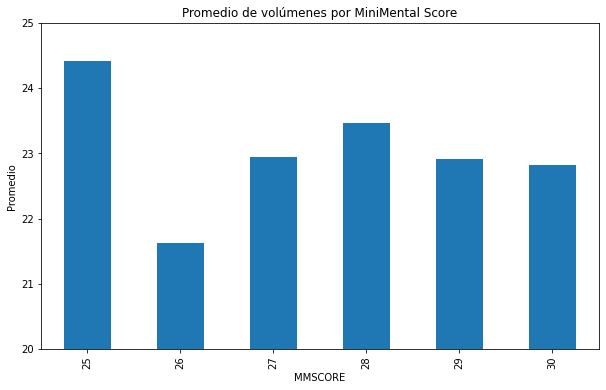

In [325]:
# Calcular el promedio de cada fila
row_means = adni_means[2].mean(axis=1)

print(row_means)

# Graficar el promedio de cada fila
row_means.plot(kind='bar', figsize=(10, 6))

# Configurar el título y las etiquetas de los ejes
plt.title('Promedio de volúmenes por MiniMental Score')
plt.xlabel('MMSCORE')
plt.ylabel('Promedio')


plt.ylim(20, 25)
# Mostrar el gráfico
plt.show()

PTGENDER
Hombre    24.161462
Mujer     21.613565
dtype: float64


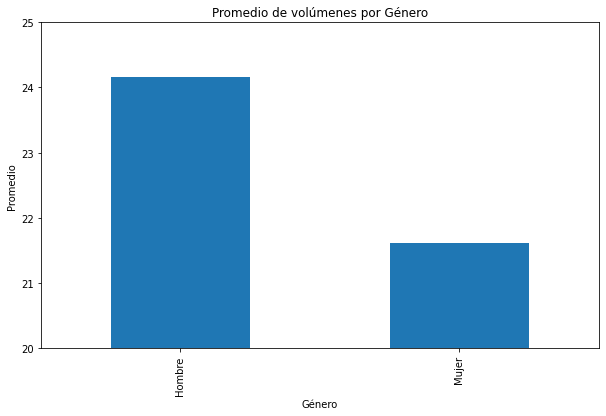

In [326]:
# Calcular el promedio de cada fila
row_means = adni_means[3].mean(axis=1)

print(row_means)

# Graficar el promedio de cada fila
row_means.plot(kind='bar', figsize=(10, 6))

# Configurar el título y las etiquetas de los ejes
plt.title('Promedio de volúmenes por Género')
plt.xlabel('Género')
plt.ylabel('Promedio')


plt.ylim(20, 25)
# Mostrar el gráfico
plt.show()

### GERO

In [194]:
# Columnas a eliminar
col_s = list(df_inca.columns.values)
col_s.remove("left-lateral-ventricle")
col_s.remove("wm-hypointensities")
col_s.remove("right-lateral-ventricle")
col_s = np.array(col_s)
df_inca_clean = df_inca[col_s]
print(len(df_inca.columns.values))
print(len(df_inca_clean.columns.values))

100
97


In [410]:
col_var = ['age', 'gender']
ran1 = 4
ran2 = 97
inca_age_means, inca_age_maxs, inca_age_mins, inca_age_count = df_for_analysis(df_inca_clean,col_var,ran1,ran2)

for i in range(len(col_var)):
    print("================================= PROMEDIO =================================")
    print(col_var[i]+":")
    print(tabulate(inca_age_means[i], headers='keys', tablefmt='psql'))

for i in range(len(col_var)):
    print("================================= MAXIMOS =================================")
    print(col_var[i]+":")
    print(tabulate(inca_age_maxs[i], headers='keys', tablefmt='psql'))

for i in range(len(col_var)):    
    print("================================= MINIMOS =================================")
    print(col_var[i]+":")
    print(tabulate(inca_age_mins[i], headers='keys', tablefmt='psql'))

for i in range(len(col_var)):
    print("================================= CONTEO =================================")
    print(col_var[i]+":")
    print(tabulate(inca_age_count[i], headers='keys', tablefmt='psql'))

================================= PROMEDIO =================================
age:
+-------+--------------+---------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+--------------------+---------------------+----------------------+-----------------------+------------------------+--------------------------+----------------------------+--------------------------+---------------------------+-----------------------------+---------+-------------+-------------+--------------+---------------+---------------+----------------+-----------------+-----------------+------------------+------------------+------------------+-------------------+--------------------+--------------------+--------------------+---------------------+----------------------+----------------------+----------------------+-----------------------+--------------

In [412]:
# Columnas a eliminar
col_s = list(df_inca_esco.columns.values)
col_s.remove("left-lateral-ventricle")
col_s.remove("wm-hypointensities")
col_s.remove("right-lateral-ventricle")
col_s = np.array(col_s)
df_inca_esco_clean = df_inca_esco[col_s]
print(len(df_inca_esco.columns.values))
print(len(df_inca_esco_clean.columns.values))

107
104


In [413]:
col_var = ['Escolaridad']
ran1 = 4
ran2 = 97
inca_esco_means, inca_esco_maxs, inca_esco_mins, inca_esco_counts = df_for_analysis(df_inca_esco_clean,col_var,ran1,ran2)

print("================================= PROMEDIO =================================")
print(col_var[0]+":")
print(tabulate(inca_esco_means[0], headers='keys', tablefmt='psql'))

print("================================= MAXIMOS =================================")
print(col_var[0]+":")
print(tabulate(inca_esco_maxs[0], headers='keys', tablefmt='psql'))
    
print("================================= MINIMOS =================================")
print(col_var[0]+":")
print(tabulate(inca_esco_mins[0], headers='keys', tablefmt='psql'))

print("================================= CONTEO =================================")
print(col_var[0]+":")
print(tabulate(inca_esco_counts[0], headers='keys', tablefmt='psql'))

================================= PROMEDIO =================================
Escolaridad:
+---------------+--------------+---------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+--------------------+---------------------+----------------------+-----------------------+------------------------+--------------------------+----------------------------+--------------------------+---------------------------+-----------------------------+---------+-------------+-------------+--------------+---------------+---------------+----------------+-----------------+-----------------+------------------+------------------+------------------+-------------------+--------------------+--------------------+--------------------+---------------------+----------------------+----------------------+----------------------+----------------------

In [201]:
# Columnas a eliminar
col_s = list(df_inca_psico.columns.values)
col_s.remove("left-lateral-ventricle")
col_s.remove("wm-hypointensities")
col_s.remove("right-lateral-ventricle")
col_s = np.array(col_s)
df_inca_psico_clean = df_inca_psico[col_s]
print(len(df_inca_psico.columns.values))
print(len(df_inca_psico_clean.columns.values))

122
119


In [414]:
col_var = ['MiniMental_Total_Score']
ran1 = 4
ran2 = 97
inca_psico_means, inca_psico_maxs, inca_psico_mins, inca_psico_count = df_for_analysis(df_inca_psico_clean,col_var,ran1,ran2)

print("================================= PROMEDIO =================================")
print(col_var[0]+":")
print(tabulate(inca_psico_means[0], headers='keys', tablefmt='psql'))

print("================================= MAXIMOS =================================")
print(col_var[0]+":")
print(tabulate(inca_psico_maxs[0], headers='keys', tablefmt='psql'))
    
print("================================= MINIMOS =================================")
print(col_var[0]+":")
print(tabulate(inca_psico_mins[0], headers='keys', tablefmt='psql'))

print("================================= CONTEO =================================")
print(col_var[0]+":")
print(tabulate(inca_psico_count[0], headers='keys', tablefmt='psql'))

================================= PROMEDIO =================================
MiniMental_Total_Score:
+--------------------------+--------------+---------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+--------------------+---------------------+----------------------+-----------------------+------------------------+--------------------------+----------------------------+--------------------------+---------------------------+-----------------------------+---------+-------------+-------------+--------------+---------------+---------------+----------------+-----------------+-----------------+------------------+------------------+------------------+-------------------+--------------------+--------------------+--------------------+---------------------+----------------------+----------------------+----------------------+

Escolaridad
3     21.908030
6     24.197566
8     19.684413
10    21.334650
11    19.542195
12    19.705347
13    24.084085
15    21.377025
16    25.043382
17    20.748939
22    22.901817
23    28.039715
dtype: float64


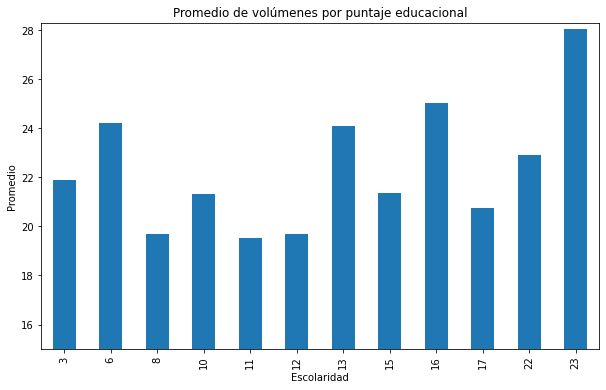

In [328]:
# Calcular el promedio de cada fila
row_means = inca_esco_means[0].mean(axis=1)

print(row_means)

# Graficar el promedio de cada fila
row_means.plot(kind='bar', figsize=(10, 6))

# Configurar el título y las etiquetas de los ejes
plt.title('Promedio de volúmenes por puntaje educacional')
plt.xlabel('Escolaridad')
plt.ylabel('Promedio')


plt.ylim(15, 28.3)
# Mostrar el gráfico
plt.show()

MiniMental_Total_Score
26.0    23.895828
27.0    21.826483
28.0    20.025387
29.0    20.482419
30.0    20.159645
dtype: float64


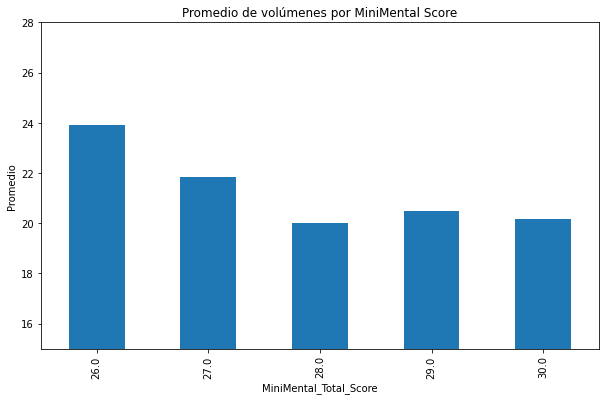

In [236]:
# Calcular el promedio de cada fila
row_means = inca_psico_means[0].mean(axis=1)

print(row_means)

# Graficar el promedio de cada fila
row_means.plot(kind='bar', figsize=(10, 6))

# Configurar el título y las etiquetas de los ejes
plt.title('Promedio de volúmenes por MiniMental Score')
plt.xlabel('MiniMental_Total_Score')
plt.ylabel('Promedio')


plt.ylim(15, 28)
# Mostrar el gráfico
plt.show()

gender
Hombre    23.609760
Mujer     20.507655
dtype: float64


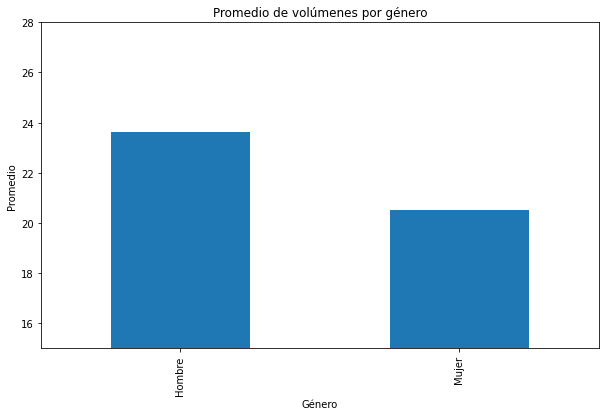

In [329]:
# Calcular el promedio de cada fila
row_means = inca_age_means[1].mean(axis=1)

print(row_means)

# Graficar el promedio de cada fila
row_means.plot(kind='bar', figsize=(10, 6))

# Configurar el título y las etiquetas de los ejes
plt.title('Promedio de volúmenes por género')
plt.xlabel('Género')
plt.ylabel('Promedio')


plt.ylim(15, 28)
# Mostrar el gráfico
plt.show()

In [ ]:
# Calcular el promedio de cada fila
row_means = inca_age_means[1].mean(axis=1)

print(row_means)

# Graficar el promedio de cada fila
row_means.plot(kind='bar', figsize=(10, 6))

# Configurar el título y las etiquetas de los ejes
plt.title('Promedio de volúmenes por edad')
plt.xlabel('Edad')
plt.ylabel('Promedio')


plt.ylim(15, 28)
# Mostrar el gráfico
plt.show()

#### Gráficos múltiples

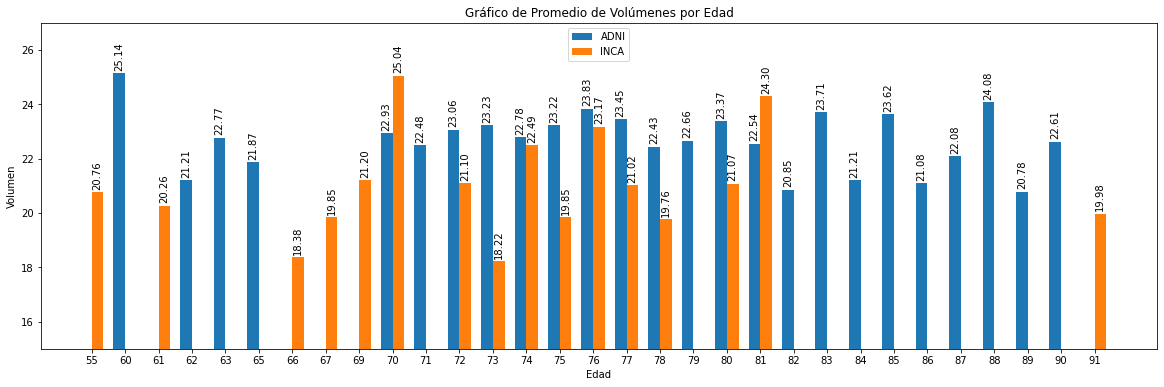

In [344]:
row_means_adni_age = adni_means[0].mean(axis=1)
row_means_adni_age.name = 'promedio_volumenes_adni'
row_means_inca_age = inca_age_means[0].mean(axis=1)
row_means_inca_age.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([row_means_adni_age, row_means_inca_age], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('Edad')
ax.set_ylabel('Volumen')
ax.set_title('Gráfico de Promedio de Volúmenes por Edad')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(15,27)
ax.legend()

# Mostrar el gráfico
plt.show()

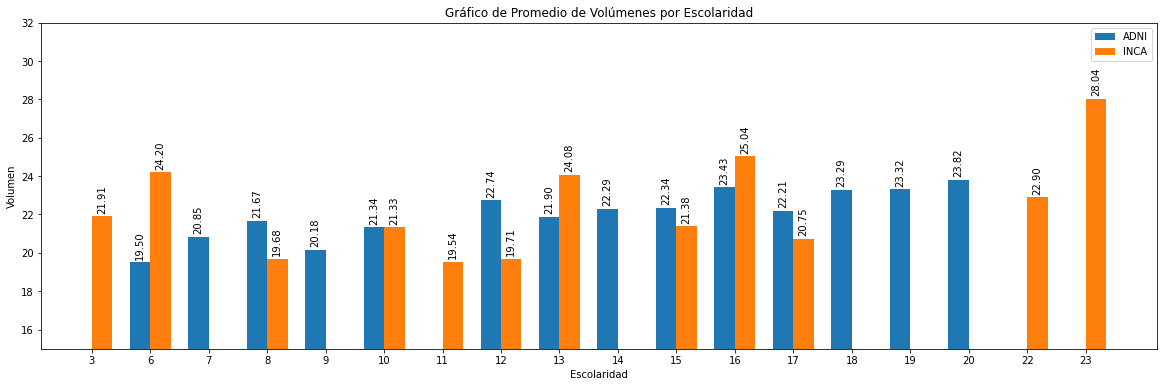

In [341]:
row_means_adni_esco = adni_means[1].mean(axis=1)
row_means_adni_esco.name = 'promedio_volumenes_adni'
row_means_inca_esco = inca_esco_means[0].mean(axis=1)
row_means_inca_esco.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([row_means_adni_esco, row_means_inca_esco], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('Escolaridad')
ax.set_ylabel('Volumen')
ax.set_title('Gráfico de Promedio de Volúmenes por Escolaridad')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(15,32)
ax.legend()

# Mostrar el gráfico
plt.show()

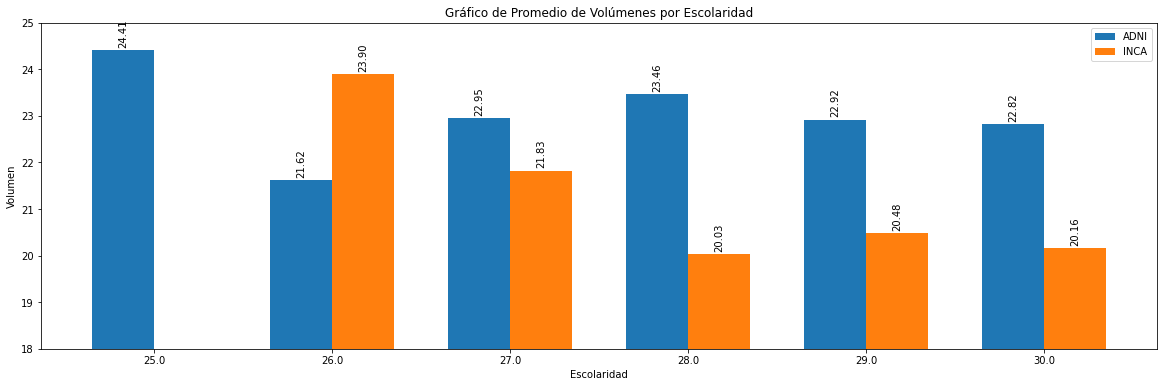

In [345]:
row_means_adni_psico = adni_means[2].mean(axis=1)
row_means_adni_psico.name = 'promedio_volumenes_adni'
row_means_inca_psico = inca_psico_means[0].mean(axis=1)
row_means_inca_psico.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([row_means_adni_psico, row_means_inca_psico], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('Escolaridad')
ax.set_ylabel('Volumen')
ax.set_title('Gráfico de Promedio de Volúmenes por Escolaridad')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(18,25)
ax.legend()

# Mostrar el gráfico
plt.show()

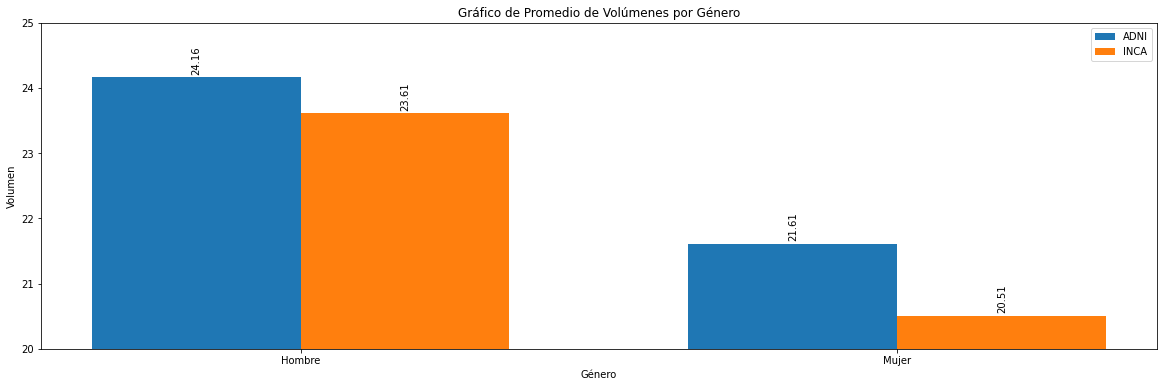

In [332]:
row_means_adni_age = adni_means[3].mean(axis=1)
row_means_adni_age.name = 'promedio_volumenes_adni'
row_means_inca_age = inca_age_means[1].mean(axis=1)
row_means_inca_age.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([row_means_adni_age, row_means_inca_age], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('Género')
ax.set_ylabel('Volumen')
ax.set_title('Gráfico de Promedio de Volúmenes por Género')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(20,25)
ax.legend()

# Mostrar el gráfico
plt.show()

#### Hipocampo

In [358]:
col_hipo_adni = ['left_hippocampus_volume','right_hippocampus_volume']
col_hipo_inca = ['left-hippocampus','right-hippocampus']

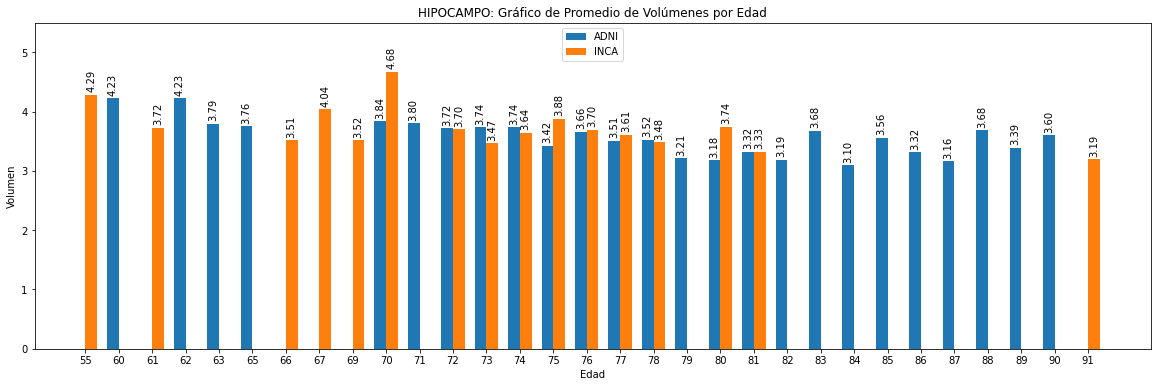

In [361]:
#EDAD
hipo_adni_age_means = adni_means[0][col_hipo_adni]
hipo_inca_age_means = inca_age_means[0][col_hipo_inca]

hipo_row_means_adni_age = hipo_adni_age_means.mean(axis=1)
hipo_row_means_adni_age.name = 'promedio_volumenes_adni'
hipo_row_means_inca_age = hipo_inca_age_means.mean(axis=1)
hipo_row_means_inca_age.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([hipo_row_means_adni_age, hipo_row_means_inca_age], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('Edad')
ax.set_ylabel('Volumen')
ax.set_title('HIPOCAMPO: Gráfico de Promedio de Volúmenes por Edad')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(0,5.5)
ax.legend()

# Mostrar el gráfico
plt.show()

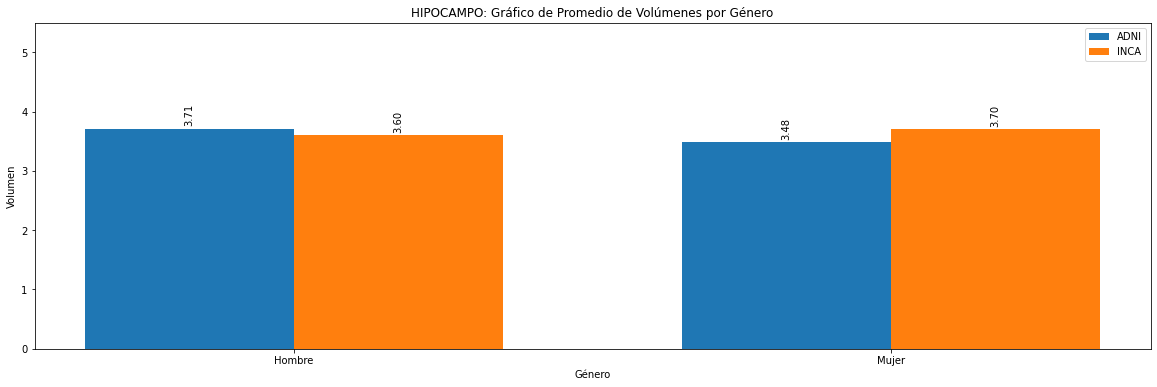

In [369]:
#GENERO
hipo_adni_gen_means = adni_means[3][col_hipo_adni]
hipo_inca_gen_means = inca_age_means[1][col_hipo_inca]

hipo_row_means_adni_gen = hipo_adni_gen_means.mean(axis=1)
hipo_row_means_adni_gen.name = 'promedio_volumenes_adni'
hipo_row_means_inca_gen = hipo_inca_gen_means.mean(axis=1)
hipo_row_means_inca_gen.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([hipo_row_means_adni_gen, hipo_row_means_inca_gen], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('Género')
ax.set_ylabel('Volumen')
ax.set_title('HIPOCAMPO: Gráfico de Promedio de Volúmenes por Género')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(0,5.5)
ax.legend()

# Mostrar el gráfico
plt.show()

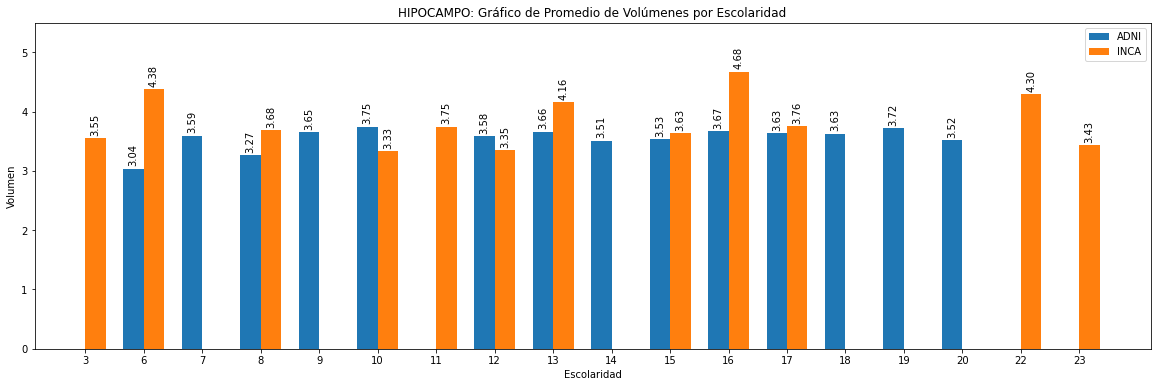

In [364]:
#ESCOLARIDAD
hipo_adni_esco_means = adni_means[1][col_hipo_adni]
hipo_inca_esco_means = inca_esco_means[0][col_hipo_inca]

hipo_row_means_adni_esco = hipo_adni_esco_means.mean(axis=1)
hipo_row_means_adni_esco.name = 'promedio_volumenes_adni'
hipo_row_means_inca_esco = hipo_inca_esco_means.mean(axis=1)
hipo_row_means_inca_esco.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([hipo_row_means_adni_esco, hipo_row_means_inca_esco], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('Escolaridad')
ax.set_ylabel('Volumen')
ax.set_title('HIPOCAMPO: Gráfico de Promedio de Volúmenes por Escolaridad')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(0,5.5)
ax.legend()

# Mostrar el gráfico
plt.show()

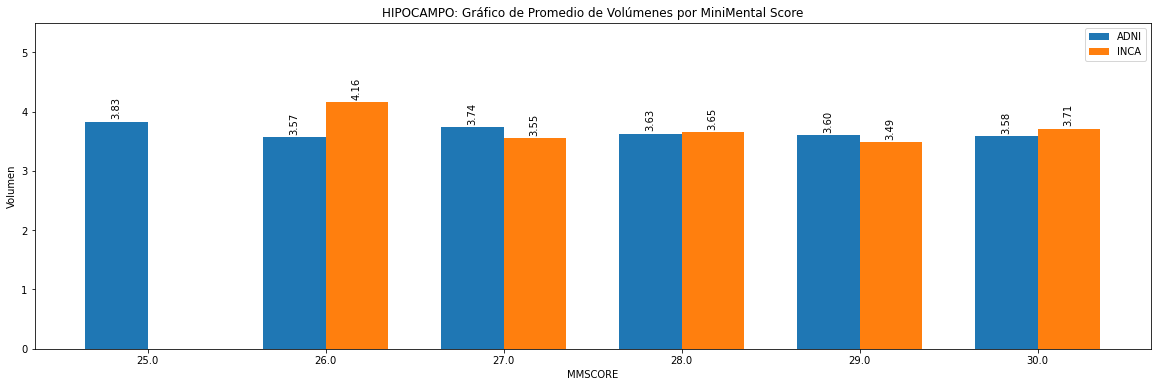

In [367]:
#MMSCORE
hipo_adni_psico_means = adni_means[2][col_hipo_adni]
hipo_inca_psico_means = inca_psico_means[0][col_hipo_inca]

hipo_row_means_adni_psico = hipo_adni_psico_means.mean(axis=1)
hipo_row_means_adni_psico.name = 'promedio_volumenes_adni'
hipo_row_means_inca_psico = hipo_inca_psico_means.mean(axis=1)
hipo_row_means_inca_psico.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([hipo_row_means_adni_psico, hipo_row_means_inca_psico], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('MMSCORE')
ax.set_ylabel('Volumen')
ax.set_title('HIPOCAMPO: Gráfico de Promedio de Volúmenes por MiniMental Score')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(0,5.5)
ax.legend()

# Mostrar el gráfico
plt.show()

#### Amigdala

In [376]:
col_hipo_adni = ['left_amygdala_volume','right_amygdala_volume']
col_hipo_inca = ['left-amygdala','right-amygdala']

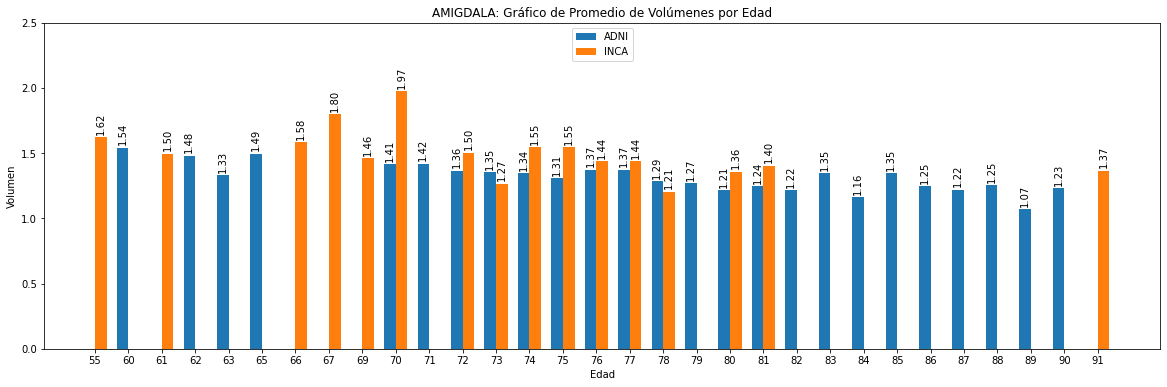

In [377]:
#EDAD
hipo_adni_age_means = adni_means[0][col_hipo_adni]
hipo_inca_age_means = inca_age_means[0][col_hipo_inca]

hipo_row_means_adni_age = hipo_adni_age_means.mean(axis=1)
hipo_row_means_adni_age.name = 'promedio_volumenes_adni'
hipo_row_means_inca_age = hipo_inca_age_means.mean(axis=1)
hipo_row_means_inca_age.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([hipo_row_means_adni_age, hipo_row_means_inca_age], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('Edad')
ax.set_ylabel('Volumen')
ax.set_title('AMIGDALA: Gráfico de Promedio de Volúmenes por Edad')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(0,2.5)
ax.legend()

# Mostrar el gráfico
plt.show()

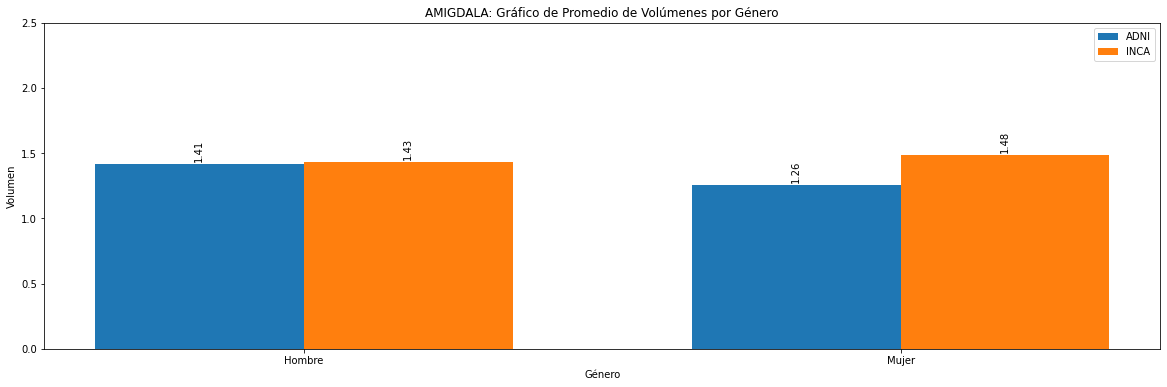

In [381]:
#GENERO
hipo_adni_gen_means = adni_means[3][col_hipo_adni]
hipo_inca_gen_means = inca_age_means[1][col_hipo_inca]

hipo_row_means_adni_gen = hipo_adni_gen_means.mean(axis=1)
hipo_row_means_adni_gen.name = 'promedio_volumenes_adni'
hipo_row_means_inca_gen = hipo_inca_gen_means.mean(axis=1)
hipo_row_means_inca_gen.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([hipo_row_means_adni_gen, hipo_row_means_inca_gen], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('Género')
ax.set_ylabel('Volumen')
ax.set_title('AMIGDALA: Gráfico de Promedio de Volúmenes por Género')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(0,2.5)
ax.legend()

# Mostrar el gráfico
plt.show()

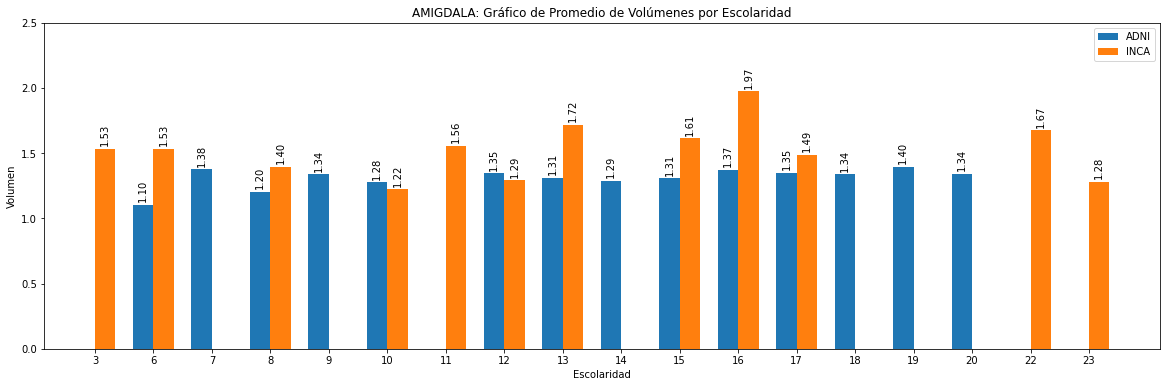

In [383]:
#ESCOLARIDAD
hipo_adni_esco_means = adni_means[1][col_hipo_adni]
hipo_inca_esco_means = inca_esco_means[0][col_hipo_inca]

hipo_row_means_adni_esco = hipo_adni_esco_means.mean(axis=1)
hipo_row_means_adni_esco.name = 'promedio_volumenes_adni'
hipo_row_means_inca_esco = hipo_inca_esco_means.mean(axis=1)
hipo_row_means_inca_esco.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([hipo_row_means_adni_esco, hipo_row_means_inca_esco], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('Escolaridad')
ax.set_ylabel('Volumen')
ax.set_title('AMIGDALA: Gráfico de Promedio de Volúmenes por Escolaridad')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(0,2.5)
ax.legend()

# Mostrar el gráfico
plt.show()

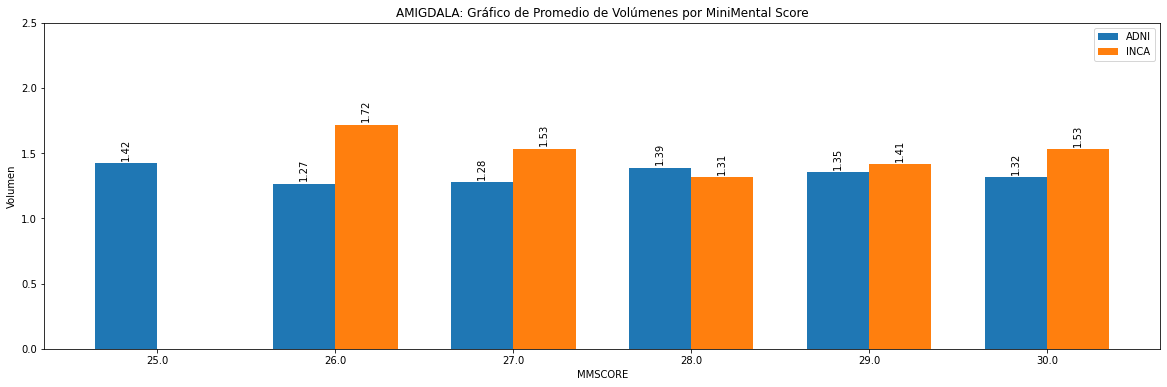

In [385]:
#MMSCORE
hipo_adni_psico_means = adni_means[2][col_hipo_adni]
hipo_inca_psico_means = inca_psico_means[0][col_hipo_inca]

hipo_row_means_adni_psico = hipo_adni_psico_means.mean(axis=1)
hipo_row_means_adni_psico.name = 'promedio_volumenes_adni'
hipo_row_means_inca_psico = hipo_inca_psico_means.mean(axis=1)
hipo_row_means_inca_psico.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([hipo_row_means_adni_psico, hipo_row_means_inca_psico], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('MMSCORE')
ax.set_ylabel('Volumen')
ax.set_title('AMIGDALA: Gráfico de Promedio de Volúmenes por MiniMental Score')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(0,2.5)
ax.legend()

# Mostrar el gráfico
plt.show()

#### Region Temporal

In [387]:
col_hipo_adni = ['lh_temporalpole_volume','lh_middletemporal_volume','lh_inferiortemporal_volume','lh_superiortemporal_volume','lh_transversetemporal_volume','rh_temporalpole_volume','rh_middletemporal_volume','rh_inferiortemporal_volume','rh_superiortemporal_volume','rh_transversetemporal_volume']
col_hipo_inca = ['lh_temporalpole','lh_middletemporal','lh_inferiortemporal','lh_superiortemporal','lh_transversetemporal','rh_temporalpole','rh_middletemporal','rh_inferiortemporal','rh_superiortemporal','rh_transversetemporal']

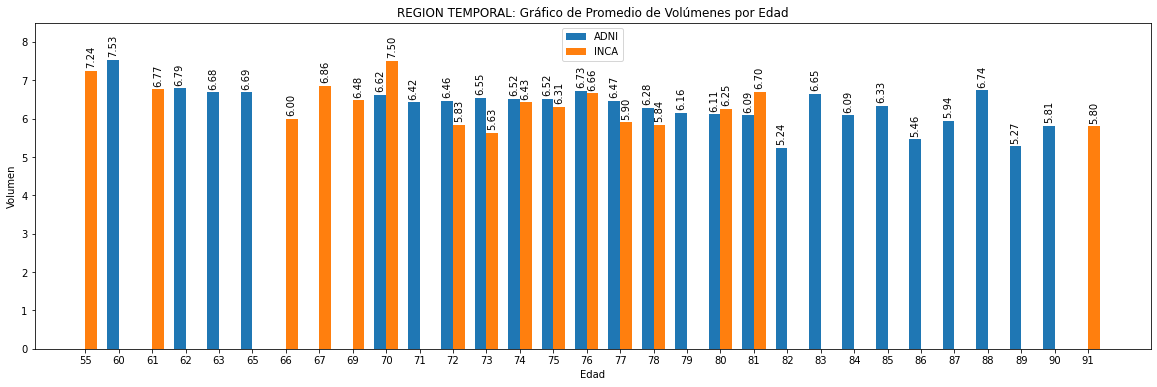

In [391]:
#EDAD
hipo_adni_age_means = adni_means[0][col_hipo_adni]
hipo_inca_age_means = inca_age_means[0][col_hipo_inca]

hipo_row_means_adni_age = hipo_adni_age_means.mean(axis=1)
hipo_row_means_adni_age.name = 'promedio_volumenes_adni'
hipo_row_means_inca_age = hipo_inca_age_means.mean(axis=1)
hipo_row_means_inca_age.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([hipo_row_means_adni_age, hipo_row_means_inca_age], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('Edad')
ax.set_ylabel('Volumen')
ax.set_title('REGION TEMPORAL: Gráfico de Promedio de Volúmenes por Edad')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(0,8.5)
ax.legend()

# Mostrar el gráfico
plt.show()

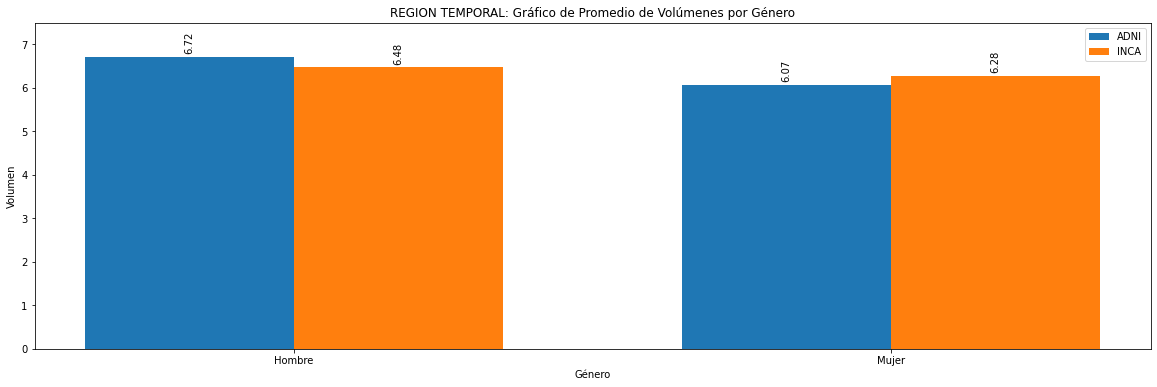

In [395]:
#GENERO
hipo_adni_gen_means = adni_means[3][col_hipo_adni]
hipo_inca_gen_means = inca_age_means[1][col_hipo_inca]

hipo_row_means_adni_gen = hipo_adni_gen_means.mean(axis=1)
hipo_row_means_adni_gen.name = 'promedio_volumenes_adni'
hipo_row_means_inca_gen = hipo_inca_gen_means.mean(axis=1)
hipo_row_means_inca_gen.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([hipo_row_means_adni_gen, hipo_row_means_inca_gen], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('Género')
ax.set_ylabel('Volumen')
ax.set_title('REGION TEMPORAL: Gráfico de Promedio de Volúmenes por Género')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(0,7.5)
ax.legend()

# Mostrar el gráfico
plt.show()

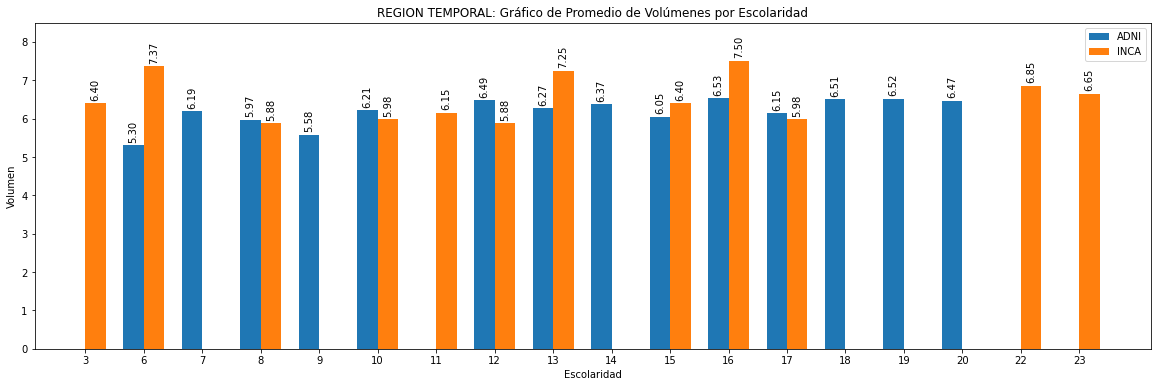

In [398]:
#ESCOLARIDAD
hipo_adni_esco_means = adni_means[1][col_hipo_adni]
hipo_inca_esco_means = inca_esco_means[0][col_hipo_inca]

hipo_row_means_adni_esco = hipo_adni_esco_means.mean(axis=1)
hipo_row_means_adni_esco.name = 'promedio_volumenes_adni'
hipo_row_means_inca_esco = hipo_inca_esco_means.mean(axis=1)
hipo_row_means_inca_esco.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([hipo_row_means_adni_esco, hipo_row_means_inca_esco], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('Escolaridad')
ax.set_ylabel('Volumen')
ax.set_title('REGION TEMPORAL: Gráfico de Promedio de Volúmenes por Escolaridad')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(0,8.5)
ax.legend()

# Mostrar el gráfico
plt.show()

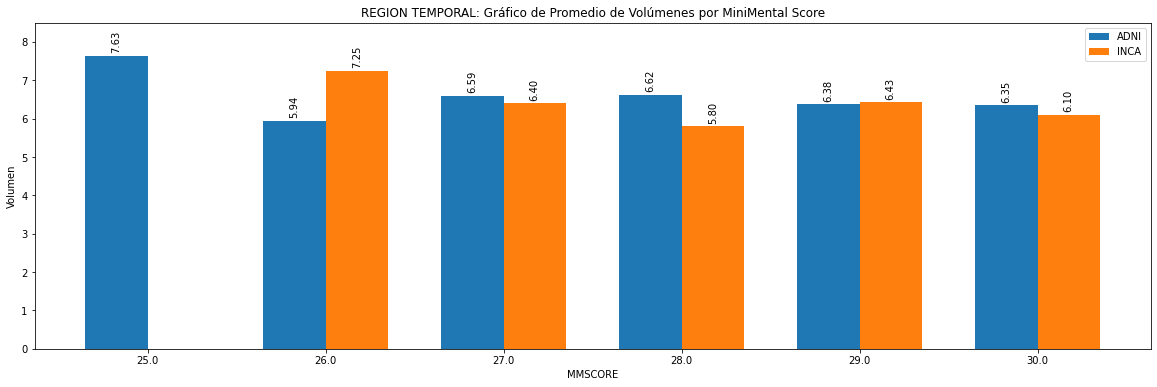

In [400]:
#MMSCORE
hipo_adni_psico_means = adni_means[2][col_hipo_adni]
hipo_inca_psico_means = inca_psico_means[0][col_hipo_inca]

hipo_row_means_adni_psico = hipo_adni_psico_means.mean(axis=1)
hipo_row_means_adni_psico.name = 'promedio_volumenes_adni'
hipo_row_means_inca_psico = hipo_inca_psico_means.mean(axis=1)
hipo_row_means_inca_psico.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([hipo_row_means_adni_psico, hipo_row_means_inca_psico], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('MMSCORE')
ax.set_ylabel('Volumen')
ax.set_title('REGION TEMPORAL: Gráfico de Promedio de Volúmenes por MiniMental Score')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(0,8.5)
ax.legend()

# Mostrar el gráfico
plt.show()

#### Region Frontal

In [408]:
col_hipo_adni = ['lh_frontalpole_volume','lh_frontalpole_volume','lh_superiorfrontal_volume','lh_caudalmiddlefrontal_volume','lh_medialorbitofrontal_volume','lh_lateralorbitofrontal_volume','lh_rostralmiddlefrontal_volume','rh_frontalpole_volume','rh_superiorfrontal_volume','rh_caudalmiddlefrontal_volume','rh_medialorbitofrontal_volume','rh_lateralorbitofrontal_volume','rh_rostralmiddlefrontal_volume']
col_hipo_inca = ['lh_frontalpole','lh_frontalpole','lh_superiorfrontal','lh_caudalmiddlefrontal','lh_medialorbitofrontal','lh_lateralorbitofrontal','lh_rostralmiddlefrontal','rh_frontalpole','rh_superiorfrontal','rh_caudalmiddlefrontal','rh_medialorbitofrontal','rh_lateralorbitofrontal','rh_rostralmiddlefrontal']

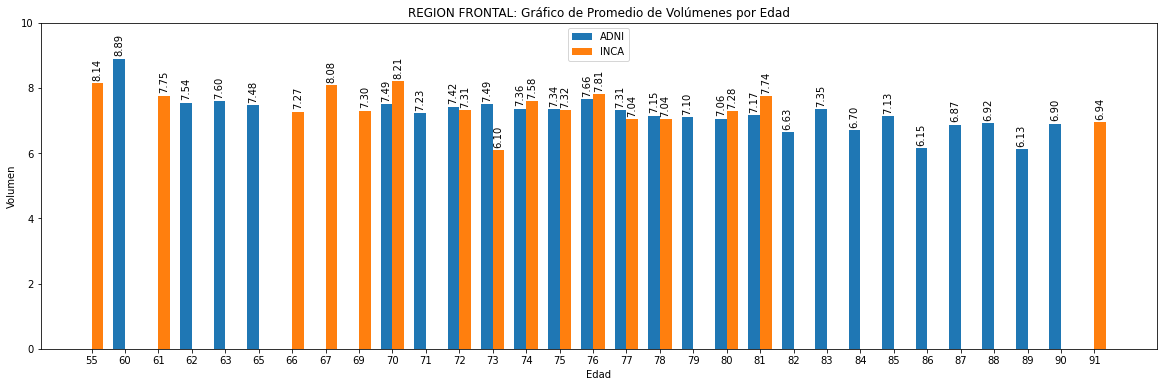

In [418]:
#EDAD
hipo_adni_age_means = adni_means[0][col_hipo_adni]
hipo_inca_age_means = inca_age_means[0][col_hipo_inca]

hipo_row_means_adni_age = hipo_adni_age_means.mean(axis=1)
hipo_row_means_adni_age.name = 'promedio_volumenes_adni'
hipo_row_means_inca_age = hipo_inca_age_means.mean(axis=1)
hipo_row_means_inca_age.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([hipo_row_means_adni_age, hipo_row_means_inca_age], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('Edad')
ax.set_ylabel('Volumen')
ax.set_title('REGION FRONTAL: Gráfico de Promedio de Volúmenes por Edad')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(0,10)
ax.legend()

# Mostrar el gráfico
plt.show()

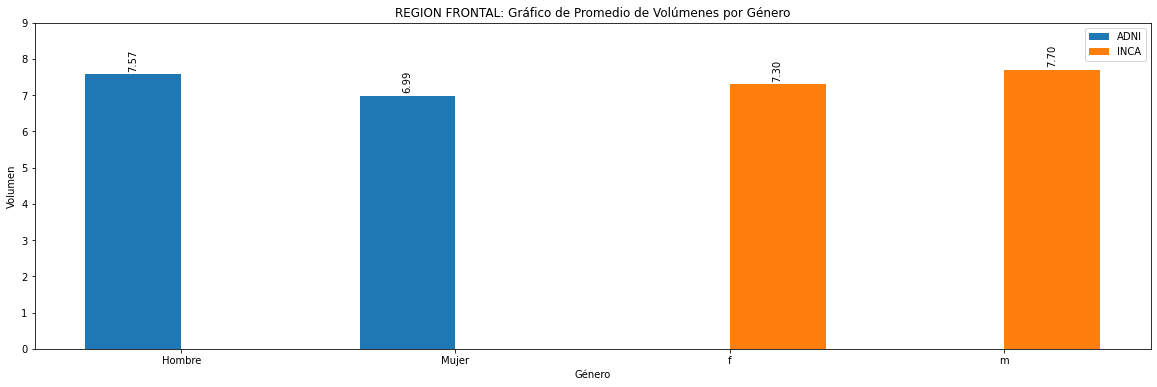

In [420]:
#GENERO
hipo_adni_gen_means = adni_means[3][col_hipo_adni]
hipo_inca_gen_means = inca_age_means[1][col_hipo_inca]

hipo_row_means_adni_gen = hipo_adni_gen_means.mean(axis=1)
hipo_row_means_adni_gen.name = 'promedio_volumenes_adni'
hipo_row_means_inca_gen = hipo_inca_gen_means.mean(axis=1)
hipo_row_means_inca_gen.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([hipo_row_means_adni_gen, hipo_row_means_inca_gen], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('Género')
ax.set_ylabel('Volumen')
ax.set_title('REGION FRONTAL: Gráfico de Promedio de Volúmenes por Género')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(0,9)
ax.legend()

# Mostrar el gráfico
plt.show()

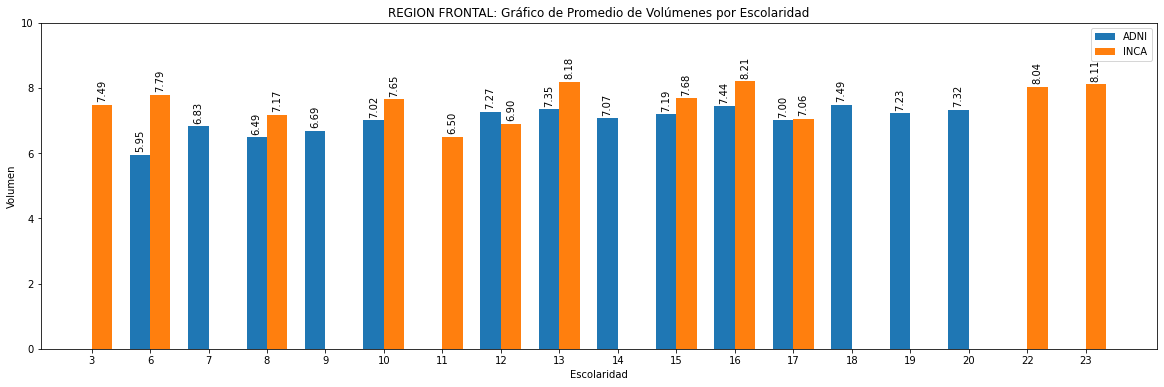

In [424]:
#ESCOLARIDAD
hipo_adni_esco_means = adni_means[1][col_hipo_adni]
hipo_inca_esco_means = inca_esco_means[0][col_hipo_inca]

hipo_row_means_adni_esco = hipo_adni_esco_means.mean(axis=1)
hipo_row_means_adni_esco.name = 'promedio_volumenes_adni'
hipo_row_means_inca_esco = hipo_inca_esco_means.mean(axis=1)
hipo_row_means_inca_esco.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([hipo_row_means_adni_esco, hipo_row_means_inca_esco], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('Escolaridad')
ax.set_ylabel('Volumen')
ax.set_title('REGION FRONTAL: Gráfico de Promedio de Volúmenes por Escolaridad')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(0,10)
ax.legend()

# Mostrar el gráfico
plt.show()

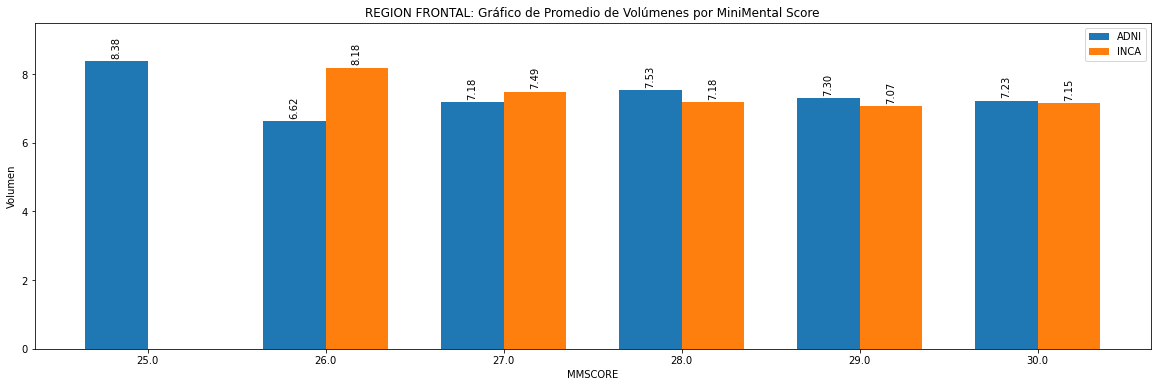

In [426]:
#MMSCORE
hipo_adni_psico_means = adni_means[2][col_hipo_adni]
hipo_inca_psico_means = inca_psico_means[0][col_hipo_inca]

hipo_row_means_adni_psico = hipo_adni_psico_means.mean(axis=1)
hipo_row_means_adni_psico.name = 'promedio_volumenes_adni'
hipo_row_means_inca_psico = hipo_inca_psico_means.mean(axis=1)
hipo_row_means_inca_psico.name = 'promedio_volumenes_inca'

# Crear el dataframe temporal
df_temp = pd.concat([hipo_row_means_adni_psico, hipo_row_means_inca_psico], axis=1)
df_temp = df_temp.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
index = np.arange(len(df_temp.index), dtype='float64')

# Graficar
bars1 = ax.bar(index, df_temp['promedio_volumenes_adni'], width=bar_width, label='ADNI')
index += bar_width
bars2 = ax.bar(index, df_temp['promedio_volumenes_inca'], width=bar_width, label='INCA')
index -= bar_width/2

# Agregar los valores del eje y arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', rotation=90)

# Personalizar el gráfico
ax.set_xlabel('MMSCORE')
ax.set_ylabel('Volumen')
ax.set_title('REGION FRONTAL: Gráfico de Promedio de Volúmenes por MiniMental Score')
ax.set_xticks(index)
ax.set_xticklabels(df_temp.index)
ax.set_ylim(0,9.5)
ax.legend()

# Mostrar el gráfico
plt.show()

## DBSCAN

### ADNI ALGUNOS VALORES

In [139]:
# Columnas a estudiar
col_s = list(df_adni_new.columns[4:100].values)
col_s.remove("left_anteriorlateralventricle")
col_s.remove("nonwmhypointensities_volume")
col_s.remove("right_inferiorlateralventricle_volume")
col_s = np.array(col_s)

,brainstem_volume,left_vessel_volume,left_caudate_volume,left_putamen_volume,opticchiasm_volume,right_vessel_volume,left_amygdala_volume,left_pallidum_volume,left_thalamus_volume,right_caudate_volume,...,rh_transversetemporal_volume,rh_caudalmiddlefrontal_volume,rh_medialorbitofrontal_volume,rh_lateralorbitofrontal_volume,rh_rostralmiddlefrontal_volume,rh_caudalanteriorcingulate_volume,rh_rostralanteriorcingulate_volume,MMSCORE,AGE,PTEDUCAT
0,0.861257,-1.079260,1.930261,0.107035,-0.186464,-0.502226,2.371457,0.313562,1.150907,2.223622,...,-1.208577,1.240951,-0.288339,0.965261,1.733849,1.183473,0.955024,28,74,16
1,0.440411,0.096192,-0.600010,-0.070633,-0.186464,-0.631274,-1.753490,0.427902,0.011992,-0.153677,...,1.861397,0.398626,2.224630,1.834224,1.204697,-0.265503,0.784195,29,74,16
2,-0.658983,-0.302267,-1.691614,-1.320542,0.207837,-0.686581,-0.760074,-1.369994,-1.536008,-1.705272,...,-1.110391,-1.465241,-1.035691,-0.130325,-0.055697,-0.006931,0.451529,28,84,18
3,-2.264415,-1.796485,0.249230,-0.988584,0.156406,-1.221211,-0.860928,-0.971776,-2.150315,-0.516623,...,-0.357625,-0.648903,-1.784911,-0.478199,-0.761943,-1.002187,-0.900114,29,78,12
4,1.160704,0.673956,-0.923807,-0.736108,-0.203608,-0.078209,-0.553322,-0.770696,0.040533,-0.603730,...,-1.476955,-1.114870,-0.013688,-1.204259,-0.603995,0.812691,0.364617,29,81,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,-0.173819,-1.796485,0.402404,0.897189,-1.643664,-1.165904,-0.270930,0.881319,-0.301957,0.390743,...,0.362412,-1.198207,-0.331312,-0.330966,-0.617291,0.788298,0.106875,30,71,14
225,-0.046457,-0.880031,2.430499,0.856668,0.962152,-0.686581,0.198043,1.039029,1.252839,0.866203,...,0.951533,0.770503,1.410017,-0.891028,0.048006,-1.543723,-1.769242,30,76,19
226,1.575160,-0.401881,0.464449,2.245283,1.030726,-1.018420,0.661974,0.979887,2.249049,0.354448,...,0.558785,1.980225,-0.161290,1.122599,1.588133,-0.982672,1.386591,30,60,20
227,1.708911,-0.880031,-0.774511,0.220804,-1.849386,-0.944678,0.868726,-4.445343,0.902194,-0.576509,...,-0.802739,-0.131859,1.320335,0.110733,-0.874688,-0.721662,-1.011003,30,72,18


[0.49054743 0.12966143]


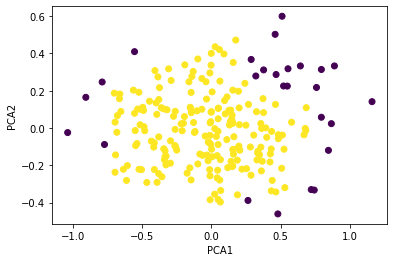

In [163]:
# Analisis Multivariable de ciertas areas
df_hipo = pd.DataFrame({
                        'left_hippocampus_volume':df_adni_new['left_hippocampus_volume'], 
                        'right_hippocampus_volume':df_adni_new['right_hippocampus_volume'],
                        'lh_precuneus_volume':df_adni_new['lh_precuneus_volume'], 
                        'left_hippocampus_volume':df_adni_new['left_hippocampus_volume'], 
                        'right_hippocampus_volume':df_adni_new['right_hippocampus_volume'],
                        'lh_precuneus_volume':df_adni_new['lh_precuneus_volume'], 
                        'rh_precuneus_volume':df_adni_new['rh_precuneus_volume'],
                        'lh_cuneus_volume':df_adni_new['lh_cuneus_volume'],
                        'rh_cuneus_volume':df_adni_new['rh_cuneus_volume'],
                        'lh_inferiorparietal_volume':df_adni_new['lh_inferiorparietal_volume'], 
                        'lh_superiorparietal_volume':df_adni_new['lh_superiorparietal_volume'],
                        'rh_inferiorparietal_volume':df_adni_new['rh_inferiorparietal_volume'], 
                        'rh_superiorparietal_volume':df_adni_new['rh_superiorparietal_volume']
                        })

mms = MinMaxScaler()
df_hipo = mms.fit_transform(df_hipo)

# Aplicar PCA con 2 componentes
pca = PCA(n_components=2, random_state=42)
pca_ = pca.fit_transform(df_hipo)
pca_df = pd.DataFrame({'PCA1':pca_[:,0], 'PCA2':pca_[:,1]})

print(pca.explained_variance_ratio_)

# DBSCAN
idx, epsilon = get_eps(pca_df,7)
dbscan = DBSCAN(eps=epsilon, min_samples=7, metric = "euclidean").fit(pca_df)
clusters = dbscan.fit_predict(pca_df)
df_values = pca_df.values

# Graficación de los clústers.
plt.scatter(df_values[:, 0], df_values[:, 1], c=clusters)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

#### Hipocampo

[0.91895252 0.08104748]


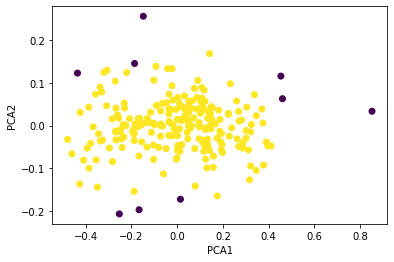

In [162]:
# Analisis Multivariable de ciertas areas
df_hipo = pd.DataFrame({
                        'left_hippocampus_volume':df_adni_new['left_hippocampus_volume'], 
                        'right_hippocampus_volume':df_adni_new['right_hippocampus_volume']
                        })

mms = MinMaxScaler()
df_hipo = mms.fit_transform(df_hipo)

# Aplicar PCA con 2 componentes
pca = PCA(n_components=2, random_state=42)
pca_ = pca.fit_transform(df_hipo)
pca_df = pd.DataFrame({'PCA1':pca_[:,0], 'PCA2':pca_[:,1]})

print(pca.explained_variance_ratio_)

# DBSCAN
idx, epsilon = get_eps(pca_df,7)
dbscan = DBSCAN(eps=epsilon, min_samples=7, metric = "euclidean").fit(pca_df)
clusters = dbscan.fit_predict(pca_df)
df_values = pca_df.values

# Graficación de los clústers.
plt.scatter(df_values[:, 0], df_values[:, 1], c=clusters)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

#### Amigdala

[0.88024724 0.11975276]


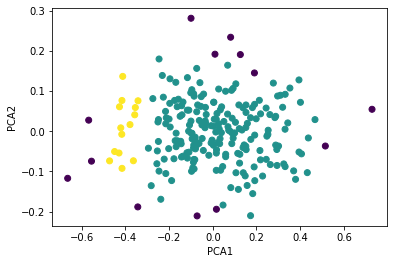

In [161]:
# Analisis Multivariable de ciertas areas
df_hipo = pd.DataFrame({
                        'left_amygdala_volume':df_adni_new['left_amygdala_volume'], 
                        'right_amygdala_volume':df_adni_new['right_amygdala_volume']
                        })

mms = MinMaxScaler()
df_hipo = mms.fit_transform(df_hipo)

# Aplicar PCA con 2 componentes
pca = PCA(n_components=2, random_state=42)
pca_ = pca.fit_transform(df_hipo)
pca_df = pd.DataFrame({'PCA1':pca_[:,0], 'PCA2':pca_[:,1]})

print(pca.explained_variance_ratio_)

# DBSCAN
idx, epsilon = get_eps(pca_df,4)
dbscan = DBSCAN(eps=epsilon, min_samples=4, metric = "euclidean").fit(pca_df)
clusters = dbscan.fit_predict(pca_df)
df_values = pca_df.values

# Graficación de los clústers.
plt.scatter(df_values[:, 0], df_values[:, 1], c=clusters)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

#### Region Temporal

[0.48885047 0.1375926 ]


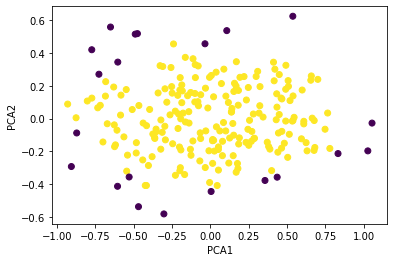

In [346]:
# Analisis Multivariable de ciertas areas
df_hipo = pd.DataFrame({
                        'lh_temporalpole_volume':df_adni_new['lh_temporalpole_volume'], 
                        'lh_middletemporal_volume':df_adni_new['lh_middletemporal_volume'], 
                        'lh_inferiortemporal_volume':df_adni_new['lh_inferiortemporal_volume'], 
                        'lh_superiortemporal_volume':df_adni_new['lh_superiortemporal_volume'], 
                        'lh_transversetemporal_volume':df_adni_new['lh_transversetemporal_volume'],
                        'rh_temporalpole_volume':df_adni_new['rh_temporalpole_volume'], 
                        'rh_middletemporal_volume':df_adni_new['rh_middletemporal_volume'], 
                        'rh_inferiortemporal_volume':df_adni_new['rh_inferiortemporal_volume'], 
                        'rh_superiortemporal':df_adni_new['rh_superiortemporal_volume'], 
                        'rh_transversetemporal_volume':df_adni_new['rh_transversetemporal_volume']
                        })

mms = MinMaxScaler()
df_hipo = mms.fit_transform(df_hipo)

# Aplicar PCA con 2 componentes
pca = PCA(n_components=2, random_state=42)
pca_ = pca.fit_transform(df_hipo)
pca_df = pd.DataFrame({'PCA1':pca_[:,0], 'PCA2':pca_[:,1]})

print(pca.explained_variance_ratio_)

# DBSCAN
idx, epsilon = get_eps(pca_df,7)
dbscan = DBSCAN(eps=epsilon, min_samples=7, metric = "euclidean").fit(pca_df)
clusters = dbscan.fit_predict(pca_df)
df_values = pca_df.values

# Graficación de los clústers.
plt.scatter(df_values[:, 0], df_values[:, 1], c=clusters)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

#### Region Frontal

[0.48237999 0.10826091]


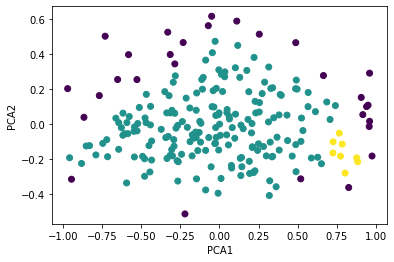

In [155]:
# Analisis Multivariable de ciertas areas
df_hipo = pd.DataFrame({
                        'lh_frontalpole_volume':df_adni_new['lh_frontalpole_volume'], 
                        'lh_superiorfrontal_volume':df_adni_new['lh_superiorfrontal_volume'], 
                        'lh_caudalmiddlefrontal_volume':df_adni_new['lh_caudalmiddlefrontal_volume'], 
                        'lh_medialorbitofrontal_volume':df_adni_new['lh_medialorbitofrontal_volume'], 
                        'lh_lateralorbitofrontal_volume':df_adni_new['lh_lateralorbitofrontal_volume'],
                        'lh_rostralmiddlefrontal_volume':df_adni_new['lh_rostralmiddlefrontal_volume'], 
                        'rh_frontalpole_volume':df_adni_new['rh_frontalpole_volume'], 
                        'rh_superiorfrontal_volume':df_adni_new['rh_superiorfrontal_volume'], 
                        'rh_caudalmiddlefrontal_volume':df_adni_new['rh_caudalmiddlefrontal_volume'], 
                        'rh_medialorbitofrontal_volume':df_adni_new['rh_medialorbitofrontal_volume'], 
                        'rh_lateralorbitofrontal_volume':df_adni_new['rh_lateralorbitofrontal_volume'],
                        'rh_rostralmiddlefrontal_volume':df_adni_new['rh_rostralmiddlefrontal_volume']
                        })

mms = MinMaxScaler()
df_hipo = mms.fit_transform(df_hipo)

# Aplicar PCA con 2 componentes
pca = PCA(n_components=2, random_state=42)
pca_ = pca.fit_transform(df_hipo)

# Obtener los coeficientes de carga
pca_df = pd.DataFrame({'PCA1':pca_[:,0], 'PCA2':pca_[:,1]})

print(pca.explained_variance_ratio_)

# DBSCAN
idx, epsilon = get_eps(pca_df,7)
dbscan = DBSCAN(eps=epsilon, min_samples=7, metric = "euclidean").fit(pca_df)
clusters = dbscan.fit_predict(pca_df)
df_values = pca_df.values

# Graficación de los clústers.
plt.scatter(df_values[:, 0], df_values[:, 1], c=clusters)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

### GERO ALGUNOS VALORES

In [120]:
# Columnas a estudiar
col_s = list(df_inca_gm_volumen.columns[4:100].values)
col_s.remove("left-lateral-ventricle")
col_s.remove("wm-hypointensities")
col_s.remove("right-lateral-ventricle")
col_s = np.array(col_s)

[0.54968549 0.15017318]


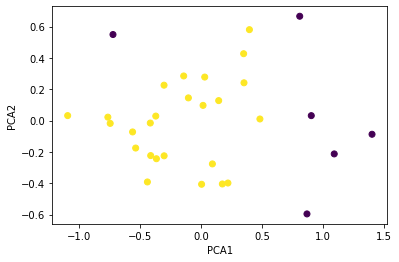

In [124]:
# Analisis Multivariable de ciertas areas
df_hipo = pd.DataFrame({
                        'left-hippocampus':df_inca_gm_volumen['left-hippocampus'], 
                        'right-hippocampus':df_inca_gm_volumen['right-hippocampus'],
                        'lh_precuneus':df_inca_gm_volumen['lh_precuneus'], 
                        'rh_precuneus':df_inca_gm_volumen['rh_precuneus'],
                        'lh_cuneus':df_inca_gm_volumen['lh_cuneus'],
                        'rh_cuneus':df_inca_gm_volumen['rh_cuneus'],
                        'lh_inferiorparietal':df_inca_gm_volumen['lh_inferiorparietal'], 
                        'lh_superiorparietal':df_inca_gm_volumen['lh_superiorparietal'],
                        'rh_inferiorparietal':df_inca_gm_volumen['rh_inferiorparietal'], 
                        'rh_superiorparietal':df_inca_gm_volumen['rh_superiorparietal']
                        })

mms = MinMaxScaler()
df_hipo = mms.fit_transform(df_hipo)

# Aplicar PCA con 2 componentes
pca = PCA(n_components=2, random_state=42)
pca_ = pca.fit_transform(df_hipo)

# Obtener los coeficientes de carga
pca_df = pd.DataFrame({'PCA1':pca_[:,0], 'PCA2':pca_[:,1]})

print(pca.explained_variance_ratio_)

# DBSCAN
idx, epsilon = get_eps(pca_df,5)
dbscan = DBSCAN(eps=epsilon, metric = "euclidean").fit(pca_df)
clusters = dbscan.fit_predict(pca_df)
df_values = pca_df.values

# Graficación de los clústers.
plt.scatter(df_values[:, 0], df_values[:, 1], c=clusters)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

#### Hipocampo

[0.92577984 0.07422016]


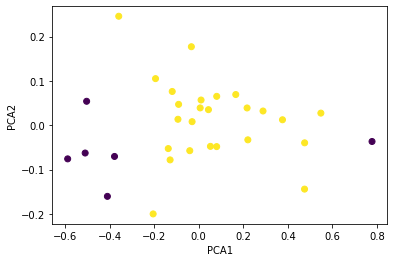

In [165]:
# Analisis Multivariable de ciertas areas
df_hipo = pd.DataFrame({
                        'left-hippocampus':df_inca['left-hippocampus'], 
                        'right-hippocampus':df_inca['right-hippocampus']
                        })

mms = MinMaxScaler()
df_hipo = mms.fit_transform(df_hipo)

# Aplicar PCA con 2 componentes
pca = PCA(n_components=2, random_state=42)
pca_ = pca.fit_transform(df_hipo)
pca_df = pd.DataFrame({'PCA1':pca_[:,0], 'PCA2':pca_[:,1]})

print(pca.explained_variance_ratio_)

# DBSCAN
idx, epsilon = get_eps(pca_df,7)
dbscan = DBSCAN(eps=epsilon, min_samples=7, metric = "euclidean").fit(pca_df)
clusters = dbscan.fit_predict(pca_df)
df_values = pca_df.values

# Graficación de los clústers.
plt.scatter(df_values[:, 0], df_values[:, 1], c=clusters)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

#### Amigdala

[0.89873936 0.10126064]


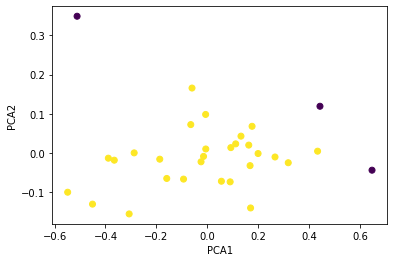

In [167]:
# Analisis Multivariable de ciertas areas
df_hipo = pd.DataFrame({
                        'left-amygdala':df_inca['left-amygdala'], 
                        'right-amygdala':df_inca['right-amygdala']
                        })

mms = MinMaxScaler()
df_hipo = mms.fit_transform(df_hipo)

# Aplicar PCA con 2 componentes
pca = PCA(n_components=2, random_state=42)
pca_ = pca.fit_transform(df_hipo)
pca_df = pd.DataFrame({'PCA1':pca_[:,0], 'PCA2':pca_[:,1]})

print(pca.explained_variance_ratio_)

# DBSCAN
idx, epsilon = get_eps(pca_df,4)
dbscan = DBSCAN(eps=epsilon, min_samples=4, metric = "euclidean").fit(pca_df)
clusters = dbscan.fit_predict(pca_df)
df_values = pca_df.values

# Graficación de los clústers.
plt.scatter(df_values[:, 0], df_values[:, 1], c=clusters)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

#### Region Temporal

[0.43358384 0.1907277 ]


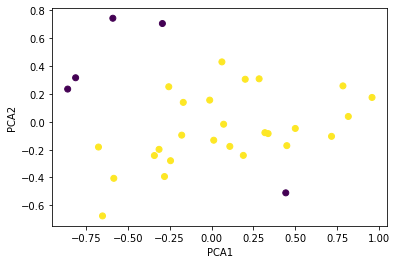

In [171]:
# Analisis Multivariable de ciertas areas
df_hipo = pd.DataFrame({
                        'lh_temporalpole':df_inca['lh_temporalpole'], 
                        'lh_middletemporal':df_inca['lh_middletemporal'], 
                        'lh_inferiortemporal':df_inca['lh_inferiortemporal'], 
                        'lh_superiortemporal':df_inca['lh_superiortemporal'], 
                        'lh_transversetemporal':df_inca['lh_transversetemporal'],
                        'rh_temporalpole':df_inca['rh_temporalpole'], 
                        'rh_middletemporal':df_inca['rh_middletemporal'], 
                        'rh_inferiortemporal':df_inca['rh_inferiortemporal'], 
                        'rh_superiortemporal':df_inca['rh_superiortemporal'], 
                        'rh_transversetemporal':df_inca['rh_transversetemporal']
                        })

mms = MinMaxScaler()
df_hipo = mms.fit_transform(df_hipo)

# Aplicar PCA con 2 componentes
pca = PCA(n_components=2, random_state=42)
pca_ = pca.fit_transform(df_hipo)
pca_df = pd.DataFrame({'PCA1':pca_[:,0], 'PCA2':pca_[:,1]})

print(pca.explained_variance_ratio_)

# DBSCAN
idx, epsilon = get_eps(pca_df,4)
dbscan = DBSCAN(eps=epsilon, min_samples=4, metric = "euclidean").fit(pca_df)
clusters = dbscan.fit_predict(pca_df)
df_values = pca_df.values

# Graficación de los clústers.
plt.scatter(df_values[:, 0], df_values[:, 1], c=clusters)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

#### Region Frontal

[0.44105495 0.21403836]


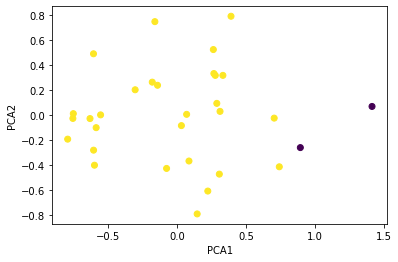

In [176]:
# Analisis Multivariable de ciertas areas
df_hipo = pd.DataFrame({
                        'lh_frontalpole':df_inca['lh_frontalpole'], 
                        'lh_superiorfrontal':df_inca['lh_superiorfrontal'], 
                        'lh_caudalmiddlefrontal':df_inca['lh_caudalmiddlefrontal'], 
                        'lh_medialorbitofrontal':df_inca['lh_medialorbitofrontal'], 
                        'lh_lateralorbitofrontal':df_inca['lh_lateralorbitofrontal'],
                        'lh_rostralmiddlefrontal':df_inca['lh_rostralmiddlefrontal'], 
                        'rh_frontalpole':df_inca['rh_frontalpole'], 
                        'rh_superiorfrontal':df_inca['rh_superiorfrontal'], 
                        'rh_caudalmiddlefrontal':df_inca['rh_caudalmiddlefrontal'], 
                        'rh_medialorbitofrontal':df_inca['rh_medialorbitofrontal'], 
                        'rh_lateralorbitofrontal':df_inca['rh_lateralorbitofrontal'],
                        'rh_rostralmiddlefrontal':df_inca['rh_rostralmiddlefrontal']
                        })

mms = MinMaxScaler()
df_hipo = mms.fit_transform(df_hipo)

# Aplicar PCA con 2 componentes
pca = PCA(n_components=2, random_state=42)
pca_ = pca.fit_transform(df_hipo)

# Obtener los coeficientes de carga
pca_df = pd.DataFrame({'PCA1':pca_[:,0], 'PCA2':pca_[:,1]})

print(pca.explained_variance_ratio_)

# DBSCAN
idx, epsilon = get_eps(pca_df,7)
dbscan = DBSCAN(eps=epsilon, min_samples=7, metric = "euclidean").fit(pca_df)
clusters = dbscan.fit_predict(pca_df)
df_values = pca_df.values

# Graficación de los clústers.
plt.scatter(df_values[:, 0], df_values[:, 1], c=clusters)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()